In [ ]:
! pip install transformers sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.6 MB/s eta 0:00:00


In [ ]:
from collections import Counter, defaultdict
import numpy as np
from tqdm import tqdm, trange
import random
import torch
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

# Дополняем словарь токенов токенизатора LaBSE токенами бурятского языка
с помощью только одноязычного бурятского текста из газеты "Буряад унэн" и художественной литературы

In [ ]:
with open ('bur_all.txt', encoding='utf-8') as f:
    bur_sentences = f.readlines()

In [ ]:
len(bur_sentences)

86927

86к предложений на бурятском языке

In [ ]:
base_model = 'facebook/mbart-large-50-many-to-many-mmt'

In [ ]:
tokenizer = MBart50TokenizerFast.from_pretrained('facebook/mbart-large-50-many-to-many-mmt')
print(tokenizer.vocab_size)

250054


In [ ]:
# выделяем токены из бурятских текстов
word_count = Counter()
bur_tokens = []
for text in tqdm(bur_sentences):
    tokens = tokenizer.tokenize(text)
    word_count.update(tokens)
    bur_tokens += tokens

100%|██████████| 86927/86927 [00:18<00:00, 4815.21it/s]


In [ ]:
print(len(word_count))
word_count.most_common(20)

14305


[('▁', 196740),
 (',', 114410),
 ('э', 113263),
 ('h', 77906),
 ('а', 72952),
 ('б', 48393),
 ('▁h', 48087),
 ('.', 35380),
 ('-', 31895),
 ('и', 30946),
 ('е', 29684),
 ('х', 29101),
 ('о', 27294),
 ('эн', 26778),
 ('ан', 23531),
 ('н', 21049),
 ('г', 19962),
 ('ба', 19863),
 ('жа', 19000),
 ('эй', 18337)]

получили 14к токенов

In [ ]:
len(set(bur_tokens))

14305

In [ ]:
tmp_tok = 'tmp_tok'
tokenizer.save_pretrained(tmp_tok)

('tmp_tok/tokenizer_config.json',
 'tmp_tok/special_tokens_map.json',
 'tmp_tok/sentencepiece.bpe.model',
 'tmp_tok/added_tokens.json',
 'tmp_tok/tokenizer.json')

In [ ]:
# дополняем токенами от бурятского языка
with open(tmp_tok + '/vocab.txt', 'a', encoding = 'utf-8') as f:
    for token in extra_vocab:
        f.write(token + '\n')

In [ ]:
tokenizer = MBart50TokenizerFast.from_pretrained('tmp_tok')

In [ ]:
len(extra_vocab)

918

In [ ]:
# дополняем токенами от бурятского языка
tokenizer.add_tokens(list(set(bur_tokens)))

0

In [ ]:
print(len(tokenizer.vocab))

250054


In [ ]:
model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")


KeyError: ignored

In [ ]:
tokenizer2 = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

In [ ]:
tokenizer2.src_lang = "mn_MN"
encoded_ar = tokenizer2('Минии эсэгэ Андрей Петрович Гринев гээшэ залуудаа граф Минихэй хажууда алба хэжэ байһанаа, 17... ондо премьер-майор зэргэ абажа, отставкада гараһан байгаа.', return_tensors="pt")
generated_tokens = model.generate(**encoded_ar, forced_bos_token_id=tokenizer2.lang_code_to_id["en_XX"])
tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)

/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (200) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


["My friend Andrei Petrovich Grinev, who is quite young, needs to be brought up by the Count of Minnesota, who is 17 — he's a former prime minister, he's in jail, he's retired."]

теперь 61к токенов

# объединение параллельных данных

In [ ]:
with open('parallel/bur_bible.txt', 'r', encoding='utf-8') as f:
    bur_bible = f.readlines()
with open('parallel/rus_bible.txt', 'r', encoding='utf-8') as f:
    rus_bible = f.readlines()

In [ ]:
with open('parallel/bur_knigi_parall.txt', 'r', encoding='utf-8') as f:
    bur_books = f.readlines()
with open('parallel/rus_knigi_parall.txt', 'r', encoding='utf-8') as f:
    rus_books = f.readlines()

In [ ]:
with open('parallel/bur_tatoeba.txt', 'r', encoding='utf-8') as f:
    bur_tatoeba = f.readlines()
with open('parallel/rus_tatoeba.txt', 'r', encoding='utf-8') as f:
    rus_tatoeba = f.readlines()

In [ ]:
with open('parallel/bur_stihi.txt', 'r', encoding='utf-8') as f:
    bur_stihi = f.readlines()
with open('parallel/rus_stihi.txt', 'r', encoding='utf-8') as f:
    rus_stihi = f.readlines()

In [ ]:
with open('parallel/bur_burlang.txt', 'r', encoding='utf-8') as f:
    bur_burlang = f.readlines()
with open('parallel/rus_burlang.txt', 'r', encoding='utf-8') as f:
    rus_burlang = f.readlines()

In [ ]:
with open('parallel/bur_slovar_dop.txt', 'r', encoding='utf-8') as f:
    bur_slovar_dop = f.readlines()
with open('parallel/rus_slovar_dop.txt', 'r', encoding='utf-8') as f:
    rus_slovar_dop = f.readlines()

In [ ]:
bur_all = bur_bible + bur_books + bur_tatoeba + bur_stihi + bur_burlang + bur_slovar_dop
rus_all = rus_bible + rus_books + rus_tatoeba + rus_stihi + bur_burlang + bur_slovar_dop
len(rus_all), len(bur_all)

(39438, 39438)

In [ ]:
pairs = []
for i in range(len(rus_all)):
    pairs.append(tuple([bur_all[i].replace('\n', ''), rus_all[i].replace('\n', '')]))

In [ ]:
pairs[10000]

('Марья Ивановна памятнигай урда скамейкэ дээрэ һуужа байһан эхэнэрые хараба.',
 'И Марья Ивановна увидела даму, сидевшую на скамейке противу памятника.')

# дообучение модели для эмбеддинга на бурятских параллельных текстах
обновляем эмбединги

In [ ]:
base_model = 'cointegrated/LaBSE-en-ru'
model = AutoModelForPreTraining.from_pretrained(base_model)

In [ ]:
model.resize_token_embeddings(tokenizer.vocab_size)

Embedding(61181, 768)

In [ ]:
for i, ids_from in enumerate(tqdm(id2ids)):
    if len(ids_from) == 1:
        continue
    model.bert.embeddings.word_embeddings.weight.data[i] = model.bert.embeddings.word_embeddings.weight.data[ids_from].mean(0)

100%|██████████| 61181/61181 [00:00<00:00, 186100.88it/s]


In [ ]:
del tokenizer.init_kwargs['special_tokens_map_file']  # this is required for correct creation of fast tokenizer from it

In [ ]:
NEW_MODEL_NAME = 'labse_bur_tokenizer'
model.save_pretrained(NEW_MODEL_NAME)
tokenizer.save_pretrained(NEW_MODEL_NAME)

('labse_bur_tokenizer/tokenizer_config.json',
 'labse_bur_tokenizer/special_tokens_map.json',
 'labse_bur_tokenizer/vocab.txt',
 'labse_bur_tokenizer/added_tokens.json')

In [ ]:
import gc

def cleanup():
    gc.collect()
    torch.cuda.empty_cache()
    
cleanup()

In [ ]:
model.cuda();

In [ ]:
for p in model.parameters():
    p.requires_grad = False
for p in model.bert.embeddings.word_embeddings.parameters():
    p.requires_grad = True

In [ ]:
batch_size = 4
margin = 0.3

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()


In [ ]:
from transformers.optimization import Adafactor
optimizer = Adafactor(
    [p for p in model.parameters() if p.requires_grad], 
    scale_parameter=False, relative_step=False, lr=1e-5, clip_threshold=1.0
)

In [ ]:
def get_acc(embeddings):
    batch_size = embeddings.shape[0] // 2
    with torch.no_grad():
        scores = torch.matmul(
            embeddings[:batch_size].detach(),
            embeddings[batch_size:].T
        ).cpu().numpy()
    a1 = (scores.argmax(1) == np.arange(batch_size)).mean()
    a2 = (scores.argmax(0) == np.arange(batch_size)).mean()
    return (a1 + a2) / 2


In [ ]:
losses = []
accuracies = []


In [ ]:
model.train()
tq = trange(100_000)
for i in tq:
    bur, ru = [list(p) for p in zip(*random.choices(pairs, k=batch_size))]
    try:
        batch = tokenizer(ru+bur, return_tensors='pt', padding=True, truncation=True, max_length=128).to(model.device)
        out = model.bert(**batch, output_hidden_states=True)
        embeddings = torch.nn.functional.normalize(out.pooler_output)
        all_scores = torch.matmul(
            embeddings[:batch_size].detach(), # keep Russian embeddings frozen
            embeddings[batch_size:].T  # update buryat embeddings
        ) - torch.eye(batch_size, device=model.device) * margin
        loss = loss_fn(all_scores, torch.arange(batch_size, device=model.device)) + loss_fn(all_scores.T, torch.arange(batch_size, device=model.device))

        loss.backward()
        optimizer.step()
        optimizer.zero_grad(set_to_none=True)
        losses.append(loss.item())
        accuracies.append(get_acc(embeddings))
    except RuntimeError:
        optimizer.zero_grad(set_to_none=True)
        batch, out, embeddings, all_scores, loss = None, None, None, None, None
        cleanup()
        print('error', max(len(s) for s in bur+ru))
        continue
    if i % 100 == 0:
        print(i, np.mean(losses[-100:]), np.mean(accuracies[-100:]))

  0%|          | 3/100000 [00:01<8:35:37,  3.23it/s] 

0 2.4715847969055176 0.625


  0%|          | 103/100000 [00:06<1:26:33, 19.23it/s]

100 2.4033905339241026 0.87875


  0%|          | 204/100000 [00:11<1:17:46, 21.39it/s]

200 2.414290246963501 0.87875


  0%|          | 304/100000 [00:16<1:31:21, 18.19it/s]

300 2.426563551425934 0.8475


  0%|          | 403/100000 [00:21<1:25:15, 19.47it/s]

400 2.4900294828414915 0.86625


  1%|          | 503/100000 [00:26<1:20:32, 20.59it/s]

500 2.417136549949646 0.87875


  1%|          | 603/100000 [00:32<1:40:15, 16.52it/s]

600 2.444915934801102 0.85125


  1%|          | 702/100000 [00:37<1:20:59, 20.43it/s]

700 2.411262013912201 0.865


  1%|          | 803/100000 [00:42<1:19:30, 20.79it/s]

800 2.4233374762535096 0.85375


  1%|          | 903/100000 [00:47<1:18:39, 21.00it/s]

900 2.4521585381031037 0.88


  1%|          | 1004/100000 [00:52<1:24:29, 19.53it/s]

1000 2.3865315222740175 0.86875


  1%|          | 1103/100000 [00:59<1:41:15, 16.28it/s]

1100 2.4289103055000307 0.8725


  1%|          | 1203/100000 [01:04<1:27:54, 18.73it/s]

1200 2.3864638018608093 0.8675


  1%|▏         | 1304/100000 [01:09<1:22:12, 20.01it/s]

1300 2.4477665543556215 0.87


  1%|▏         | 1403/100000 [01:15<1:19:24, 20.69it/s]

1400 2.4015845036506653 0.88


  2%|▏         | 1505/100000 [01:20<1:20:46, 20.32it/s]

1500 2.395594199895859 0.87125


  2%|▏         | 1603/100000 [01:25<1:37:26, 16.83it/s]

1600 2.451480963230133 0.87125


  2%|▏         | 1704/100000 [01:30<1:28:12, 18.57it/s]

1700 2.4405294942855833 0.86375


  2%|▏         | 1802/100000 [01:35<1:30:54, 18.00it/s]

1800 2.469403812885284 0.85625


  2%|▏         | 1903/100000 [01:41<1:24:56, 19.25it/s]

1900 2.3984285497665407 0.85875


  2%|▏         | 2005/100000 [01:46<1:19:03, 20.66it/s]

2000 2.3919542479515075 0.88625


  2%|▏         | 2103/100000 [01:51<1:36:47, 16.86it/s]

2100 2.4553908491134644 0.83375


  2%|▏         | 2204/100000 [01:57<1:18:08, 20.86it/s]

2200 2.396388087272644 0.88875


  2%|▏         | 2303/100000 [02:02<1:24:08, 19.35it/s]

2300 2.378090970516205 0.87


  2%|▏         | 2403/100000 [02:08<1:37:23, 16.70it/s]

2400 2.4009842133522032 0.90625


  3%|▎         | 2504/100000 [02:13<1:22:27, 19.71it/s]

2500 2.420761501789093 0.8775


  3%|▎         | 2603/100000 [02:19<1:40:23, 16.17it/s]

2600 2.4300624775886535 0.88875


  3%|▎         | 2704/100000 [02:24<1:23:34, 19.40it/s]

2700 2.393758225440979 0.85375


  3%|▎         | 2804/100000 [02:29<1:21:41, 19.83it/s]

2800 2.3955838775634763 0.8875


  3%|▎         | 2903/100000 [02:35<1:21:59, 19.74it/s]

2900 2.4404679417610167 0.85625


  3%|▎         | 3003/100000 [02:40<1:21:57, 19.73it/s]

3000 2.422028660774231 0.8725


  3%|▎         | 3104/100000 [02:45<1:44:50, 15.40it/s]

3100 2.41421128988266 0.88125


  3%|▎         | 3205/100000 [02:50<1:17:04, 20.93it/s]

3200 2.4283870792388917 0.8875


  3%|▎         | 3303/100000 [02:55<1:28:25, 18.23it/s]

3300 2.3722186768054963 0.89


  3%|▎         | 3403/100000 [03:01<1:18:42, 20.45it/s]

3400 2.3855931162834167 0.8925


  4%|▎         | 3504/100000 [03:06<1:30:19, 17.81it/s]

3500 2.400335075855255 0.9025


  4%|▎         | 3604/100000 [03:12<1:34:26, 17.01it/s]

3600 2.39113719701767 0.91625


  4%|▎         | 3703/100000 [03:17<1:22:57, 19.35it/s]

3700 2.4016618227958677 0.9


  4%|▍         | 3803/100000 [03:22<1:19:47, 20.09it/s]

3800 2.393958854675293 0.8975


  4%|▍         | 3902/100000 [03:31<1:42:24, 15.64it/s]

3900 2.419687671661377 0.8975


  4%|▍         | 4002/100000 [03:38<2:50:03,  9.41it/s]

4000 2.382639555931091 0.91875


  4%|▍         | 4103/100000 [03:45<1:13:07, 21.86it/s]

4100 2.381897155046463 0.87625


  4%|▍         | 4203/100000 [03:50<1:22:58, 19.24it/s]

4200 2.3910452270507814 0.89875


  4%|▍         | 4304/100000 [03:56<1:28:26, 18.03it/s]

4300 2.390015231370926 0.885


  4%|▍         | 4403/100000 [04:00<1:18:12, 20.37it/s]

4400 2.3708329892158506 0.91125


  5%|▍         | 4503/100000 [04:06<1:27:16, 18.24it/s]

4500 2.388755352497101 0.8725


  5%|▍         | 4602/100000 [04:11<1:14:57, 21.21it/s]

4600 2.400451645851135 0.905


  5%|▍         | 4702/100000 [04:16<1:23:51, 18.94it/s]

4700 2.408813271522522 0.895


  5%|▍         | 4804/100000 [04:22<1:22:53, 19.14it/s]

4800 2.394599678516388 0.8675


  5%|▍         | 4903/100000 [04:27<1:26:36, 18.30it/s]

4900 2.4391639471054076 0.89375


  5%|▌         | 5003/100000 [04:32<1:29:25, 17.70it/s]

5000 2.4101447427272795 0.875


  5%|▌         | 5102/100000 [04:38<1:16:36, 20.64it/s]

5100 2.3970561051368713 0.86875


  5%|▌         | 5204/100000 [04:43<1:14:04, 21.33it/s]

5200 2.359689040184021 0.87875


  5%|▌         | 5304/100000 [04:49<1:22:41, 19.09it/s]

5300 2.401439702510834 0.88375


  5%|▌         | 5404/100000 [04:54<1:36:09, 16.40it/s]

5400 2.394307475090027 0.895


  6%|▌         | 5504/100000 [05:00<1:33:38, 16.82it/s]

5500 2.4008231139183045 0.87


  6%|▌         | 5603/100000 [05:05<1:22:31, 19.06it/s]

5600 2.3932852602005004 0.885


  6%|▌         | 5704/100000 [05:11<1:19:35, 19.75it/s]

5700 2.3815948081016542 0.9075


  6%|▌         | 5803/100000 [05:16<1:26:46, 18.09it/s]

5800 2.4097260355949404 0.88375


  6%|▌         | 5903/100000 [05:21<1:16:27, 20.51it/s]

5900 2.412630920410156 0.8625


  6%|▌         | 6004/100000 [05:27<1:28:04, 17.79it/s]

6000 2.3935047936439515 0.89625


  6%|▌         | 6103/100000 [05:32<1:29:25, 17.50it/s]

6100 2.4047471570968626 0.8825


  6%|▌         | 6205/100000 [05:37<1:14:42, 20.92it/s]

6200 2.4046546149253847 0.90875


  6%|▋         | 6303/100000 [05:43<1:16:47, 20.34it/s]

6300 2.3868881464004517 0.895


  6%|▋         | 6405/100000 [05:48<1:15:36, 20.63it/s]

6400 2.382033746242523 0.91125


  7%|▋         | 6503/100000 [05:53<1:40:34, 15.49it/s]

6500 2.35113937497139 0.9125


  7%|▋         | 6605/100000 [05:59<1:18:02, 19.95it/s]

6600 2.424803602695465 0.8825


  7%|▋         | 6703/100000 [06:04<1:13:47, 21.07it/s]

6700 2.3734884881973266 0.8875


  7%|▋         | 6805/100000 [06:10<1:14:56, 20.73it/s]

6800 2.3710830748081206 0.92


  7%|▋         | 6904/100000 [06:15<1:21:02, 19.15it/s]

6900 2.4075971698760985 0.90375


  7%|▋         | 7004/100000 [06:20<1:34:09, 16.46it/s]

7000 2.3989094269275664 0.915


  7%|▋         | 7105/100000 [06:26<1:16:53, 20.14it/s]

7100 2.3679818415641787 0.88125


  7%|▋         | 7204/100000 [06:31<1:13:36, 21.01it/s]

7200 2.36223343372345 0.8825


  7%|▋         | 7303/100000 [06:38<1:43:44, 14.89it/s]

7300 2.3892659449577334 0.8975


  7%|▋         | 7403/100000 [06:44<1:26:40, 17.81it/s]

7400 2.372008076906204 0.90875


  8%|▊         | 7505/100000 [06:50<1:22:16, 18.74it/s]

7500 2.4056047439575194 0.88


  8%|▊         | 7605/100000 [06:55<1:17:01, 19.99it/s]

7600 2.3568878626823424 0.92


  8%|▊         | 7703/100000 [07:00<1:27:22, 17.60it/s]

7700 2.3907082962989805 0.88625


  8%|▊         | 7803/100000 [07:06<1:12:05, 21.31it/s]

7800 2.3877939128875734 0.9075


  8%|▊         | 7904/100000 [07:11<1:25:47, 17.89it/s]

7900 2.3857447028160097 0.885


  8%|▊         | 8003/100000 [07:17<1:15:17, 20.37it/s]

8000 2.38663067817688 0.9075


  8%|▊         | 8103/100000 [07:22<1:19:45, 19.20it/s]

8100 2.378087359666824 0.8925


  8%|▊         | 8204/100000 [07:27<1:28:38, 17.26it/s]

8200 2.391913056373596 0.90375


  8%|▊         | 8304/100000 [07:33<1:36:06, 15.90it/s]

8300 2.3857529020309447 0.885


  8%|▊         | 8403/100000 [07:38<1:14:26, 20.51it/s]

8400 2.3821515583992006 0.8975


  9%|▊         | 8504/100000 [07:43<1:23:32, 18.25it/s]

8500 2.36034477353096 0.90875


  9%|▊         | 8604/100000 [07:48<1:18:53, 19.31it/s]

8600 2.3649227941036224 0.91625


  9%|▊         | 8704/100000 [07:54<1:25:27, 17.80it/s]

8700 2.422749047279358 0.89


  9%|▉         | 8803/100000 [07:59<1:12:47, 20.88it/s]

8800 2.3619570565223693 0.90625


  9%|▉         | 8903/100000 [08:04<1:19:12, 19.17it/s]

8900 2.3518833112716675 0.92875


  9%|▉         | 9005/100000 [08:10<1:23:10, 18.23it/s]

9000 2.4098169875144957 0.91625


  9%|▉         | 9105/100000 [08:15<1:11:26, 21.21it/s]

9100 2.3854270362854004 0.8975


  9%|▉         | 9203/100000 [08:20<1:20:30, 18.80it/s]

9200 2.3951429772377013 0.8875


  9%|▉         | 9303/100000 [08:25<1:15:23, 20.05it/s]

9300 2.3777222907543183 0.8975


  9%|▉         | 9405/100000 [08:31<1:10:55, 21.29it/s]

9400 2.416133427619934 0.895


 10%|▉         | 9504/100000 [08:36<1:36:49, 15.58it/s]

9500 2.3787779140472414 0.87625


 10%|▉         | 9605/100000 [08:41<1:12:44, 20.71it/s]

9600 2.404576202630997 0.91875


 10%|▉         | 9704/100000 [08:47<1:20:30, 18.69it/s]

9700 2.3653489089012147 0.90875


 10%|▉         | 9803/100000 [08:52<1:15:12, 19.99it/s]

9800 2.3744452595710754 0.9025


 10%|▉         | 9903/100000 [08:57<1:11:10, 21.10it/s]

9900 2.354382253885269 0.91


 10%|█         | 10004/100000 [09:03<1:34:41, 15.84it/s]

10000 2.4221859681606293 0.92625


 10%|█         | 10104/100000 [09:08<1:11:57, 20.82it/s]

10100 2.3684375965595246 0.91375


 10%|█         | 10205/100000 [09:13<1:10:55, 21.10it/s]

10200 2.387232012748718 0.905


 10%|█         | 10303/100000 [09:18<1:11:09, 21.01it/s]

10300 2.3244485664367676 0.93375


 10%|█         | 10403/100000 [09:23<1:17:18, 19.31it/s]

10400 2.347554622888565 0.8875


 11%|█         | 10503/100000 [09:28<1:30:42, 16.45it/s]

10500 2.364287987947464 0.89875


 11%|█         | 10603/100000 [09:34<1:10:15, 21.21it/s]

10600 2.3583678150177003 0.91875


 11%|█         | 10703/100000 [09:39<1:14:07, 20.08it/s]

10700 2.409701118469238 0.875


 11%|█         | 10803/100000 [09:44<1:19:04, 18.80it/s]

10800 2.359607434272766 0.91875


 11%|█         | 10903/100000 [09:49<1:09:34, 21.34it/s]

10900 2.395966272354126 0.8875


 11%|█         | 11003/100000 [09:54<1:20:49, 18.35it/s]

11000 2.3387614107131958 0.92375


 11%|█         | 11104/100000 [10:00<1:09:40, 21.26it/s]

11100 2.377473818063736 0.89125


 11%|█         | 11205/100000 [10:05<1:10:39, 20.94it/s]

11200 2.3474925529956816 0.91


 11%|█▏        | 11303/100000 [10:10<1:16:59, 19.20it/s]

11300 2.3739866113662718 0.91375


 11%|█▏        | 11402/100000 [10:15<1:13:14, 20.16it/s]

11400 2.3382924938201906 0.9225


 12%|█▏        | 11503/100000 [10:21<1:23:40, 17.63it/s]

11500 2.3601060938835143 0.90125


 12%|█▏        | 11604/100000 [10:26<1:24:25, 17.45it/s]

11600 2.34498974442482 0.91625


 12%|█▏        | 11704/100000 [10:31<1:19:58, 18.40it/s]

11700 2.3405893588066102 0.92625


 12%|█▏        | 11803/100000 [10:37<1:20:09, 18.34it/s]

11800 2.3459336519241334 0.9325


 12%|█▏        | 11904/100000 [10:42<1:11:40, 20.48it/s]

11900 2.3973096299171446 0.90125


 12%|█▏        | 12004/100000 [10:47<1:23:49, 17.50it/s]

12000 2.360215723514557 0.90625


 12%|█▏        | 12103/100000 [10:53<1:09:44, 21.01it/s]

12100 2.3854446387290955 0.89


 12%|█▏        | 12203/100000 [10:58<1:21:19, 17.99it/s]

12200 2.3632051277160646 0.9125


 12%|█▏        | 12303/100000 [11:03<1:23:02, 17.60it/s]

12300 2.340302722454071 0.9125


 12%|█▏        | 12404/100000 [11:08<1:11:33, 20.40it/s]

12400 2.339083549976349 0.92875


 13%|█▎        | 12505/100000 [11:13<1:08:34, 21.27it/s]

12500 2.37931591629982 0.89


 13%|█▎        | 12603/100000 [11:19<1:09:18, 21.02it/s]

12600 2.345293381214142 0.92875


 13%|█▎        | 12705/100000 [11:23<1:06:48, 21.78it/s]

12700 2.3610436379909516 0.925


 13%|█▎        | 12804/100000 [11:29<1:27:55, 16.53it/s]

12800 2.380611596107483 0.89375


 13%|█▎        | 12904/100000 [11:34<1:12:53, 19.91it/s]

12900 2.320819057226181 0.92125


 13%|█▎        | 13004/100000 [11:39<1:11:07, 20.38it/s]

13000 2.3735795891284943 0.9275


 13%|█▎        | 13104/100000 [11:44<1:11:33, 20.24it/s]

13100 2.3589143812656403 0.9125


 13%|█▎        | 13205/100000 [11:49<1:06:58, 21.60it/s]

13200 2.3225179851055144 0.9175


 13%|█▎        | 13304/100000 [11:55<1:23:28, 17.31it/s]

13300 2.3640461945533753 0.89125


 13%|█▎        | 13401/100000 [12:00<1:12:32, 19.90it/s]

13400 2.3773854780197143 0.9275


 14%|█▎        | 13504/100000 [12:05<1:24:26, 17.07it/s]

13500 2.378390064239502 0.92125


 14%|█▎        | 13603/100000 [12:11<1:10:51, 20.32it/s]

13600 2.306044660806656 0.93625


 14%|█▎        | 13703/100000 [12:16<1:12:30, 19.84it/s]

13700 2.344979271888733 0.93125


 14%|█▍        | 13803/100000 [12:21<1:22:47, 17.35it/s]

13800 2.3289561438560487 0.9075


 14%|█▍        | 13901/100000 [12:26<1:03:48, 22.49it/s]

13900 2.358434636592865 0.9025


 14%|█▍        | 14003/100000 [12:31<1:08:57, 20.78it/s]

14000 2.323344680070877 0.91625


 14%|█▍        | 14103/100000 [12:37<1:10:38, 20.26it/s]

14100 2.376578347682953 0.925


 14%|█▍        | 14203/100000 [12:42<1:15:23, 18.97it/s]

14200 2.335802809000015 0.905


 14%|█▍        | 14303/100000 [12:47<1:26:37, 16.49it/s]

14300 2.3346723103523255 0.9225


 14%|█▍        | 14405/100000 [12:53<1:08:16, 20.90it/s]

14400 2.371194014549255 0.91625


 15%|█▍        | 14503/100000 [12:58<1:16:20, 18.67it/s]

14500 2.3443869733810425 0.9175


 15%|█▍        | 14604/100000 [13:03<1:24:56, 16.76it/s]

14600 2.342153859138489 0.925


 15%|█▍        | 14704/100000 [13:08<1:12:57, 19.49it/s]

14700 2.3183649921417238 0.91625


 15%|█▍        | 14804/100000 [13:13<1:13:55, 19.21it/s]

14800 2.367459411621094 0.8975


 15%|█▍        | 14904/100000 [13:19<1:11:08, 19.94it/s]

14900 2.3337613844871523 0.9125


 15%|█▌        | 15003/100000 [13:24<1:24:51, 16.69it/s]

15000 2.399682242870331 0.925


 15%|█▌        | 15103/100000 [13:29<1:25:40, 16.51it/s]

15100 2.337135066986084 0.94


 15%|█▌        | 15203/100000 [13:35<1:12:37, 19.46it/s]

15200 2.358919595479965 0.93625


 15%|█▌        | 15303/100000 [13:40<1:15:40, 18.65it/s]

15300 2.3379362869262694 0.95125


 15%|█▌        | 15405/100000 [13:45<1:08:31, 20.57it/s]

15400 2.358518347740173 0.93125


 16%|█▌        | 15502/100000 [13:50<1:10:19, 20.02it/s]

15500 2.3551592779159547 0.93875


 16%|█▌        | 15604/100000 [13:56<1:27:12, 16.13it/s]

15600 2.335278414487839 0.92125


 16%|█▌        | 15703/100000 [14:01<1:13:06, 19.22it/s]

15700 2.3658233523368835 0.9225


 16%|█▌        | 15805/100000 [14:06<1:07:49, 20.69it/s]

15800 2.3508613777160643 0.9425


 16%|█▌        | 15903/100000 [14:12<1:07:38, 20.72it/s]

15900 2.3323560786247253 0.925


 16%|█▌        | 16004/100000 [14:17<1:15:58, 18.43it/s]

16000 2.378076651096344 0.9125


 16%|█▌        | 16103/100000 [14:22<1:19:38, 17.56it/s]

16100 2.3523908352851866 0.91375


 16%|█▌        | 16204/100000 [14:27<1:09:39, 20.05it/s]

16200 2.335708112716675 0.93


 16%|█▋        | 16304/100000 [14:32<1:08:28, 20.37it/s]

16300 2.337472627162933 0.91625


 16%|█▋        | 16403/100000 [14:38<1:17:36, 17.95it/s]

16400 2.347794448137283 0.9275


 17%|█▋        | 16504/100000 [14:43<1:06:29, 20.93it/s]

16500 2.3482279813289644 0.9325


 17%|█▋        | 16604/100000 [14:48<1:19:28, 17.49it/s]

16600 2.3426209676265715 0.92125


 17%|█▋        | 16705/100000 [14:53<1:09:35, 19.95it/s]

16700 2.3455657970905306 0.94125


 17%|█▋        | 16804/100000 [14:58<1:10:55, 19.55it/s]

16800 2.337808974981308 0.9175


 17%|█▋        | 16904/100000 [15:04<1:15:43, 18.29it/s]

16900 2.321566925048828 0.92375


 17%|█▋        | 17004/100000 [15:09<1:12:03, 19.20it/s]

17000 2.3810982584953306 0.92375


 17%|█▋        | 17103/100000 [15:14<1:12:33, 19.04it/s]

17100 2.31800302028656 0.9625


 17%|█▋        | 17204/100000 [15:19<1:12:25, 19.05it/s]

17200 2.331167504787445 0.92375


 17%|█▋        | 17303/100000 [15:24<1:12:05, 19.12it/s]

17300 2.314620132446289 0.9225


 17%|█▋        | 17403/100000 [15:30<1:24:10, 16.36it/s]

17400 2.336913832426071 0.8975


 18%|█▊        | 17504/100000 [15:35<1:10:45, 19.43it/s]

17500 2.313537920713425 0.92125


 18%|█▊        | 17602/100000 [15:40<1:07:37, 20.31it/s]

17600 2.3871981847286223 0.905


 18%|█▊        | 17704/100000 [15:46<1:12:56, 18.81it/s]

17700 2.3144899153709413 0.93375


 18%|█▊        | 17805/100000 [15:51<1:04:27, 21.26it/s]

17800 2.333801596164703 0.9225


 18%|█▊        | 17904/100000 [15:57<1:24:03, 16.28it/s]

17900 2.3502859377861025 0.90875


 18%|█▊        | 18002/100000 [16:02<1:05:28, 20.87it/s]

18000 2.352601284980774 0.93375


 18%|█▊        | 18104/100000 [16:07<1:07:33, 20.20it/s]

18100 2.33320775270462 0.9525


 18%|█▊        | 18203/100000 [16:12<1:06:43, 20.43it/s]

18200 2.3380785894393923 0.92375


 18%|█▊        | 18302/100000 [16:17<1:14:58, 18.16it/s]

18300 2.315529843568802 0.935


 18%|█▊        | 18404/100000 [16:23<1:18:43, 17.27it/s]

18400 2.3134450137615206 0.91625


 19%|█▊        | 18503/100000 [16:28<1:07:53, 20.01it/s]

18500 2.322919771671295 0.9325


 19%|█▊        | 18604/100000 [16:33<1:17:13, 17.57it/s]

18600 2.3474716114997864 0.9375


 19%|█▊        | 18704/100000 [16:39<1:13:33, 18.42it/s]

18700 2.3288868081569674 0.935


 19%|█▉        | 18804/100000 [16:44<1:10:16, 19.26it/s]

18800 2.3357429194450376 0.94


 19%|█▉        | 18904/100000 [16:49<1:25:46, 15.76it/s]

18900 2.338327108621597 0.93


 19%|█▉        | 19003/100000 [16:55<1:16:42, 17.60it/s]

19000 2.3329333114624022 0.94375


 19%|█▉        | 19103/100000 [17:00<1:05:41, 20.52it/s]

19100 2.3235668778419494 0.94375


 19%|█▉        | 19205/100000 [17:05<1:03:35, 21.18it/s]

19200 2.348261353969574 0.9275


 19%|█▉        | 19304/100000 [17:10<1:04:43, 20.78it/s]

19300 2.307208904027939 0.92625


 19%|█▉        | 19403/100000 [17:16<1:18:24, 17.13it/s]

19400 2.3249523401260377 0.9275


 20%|█▉        | 19504/100000 [17:21<1:06:42, 20.11it/s]

19500 2.3468028688430786 0.92625


 20%|█▉        | 19603/100000 [17:26<1:03:26, 21.12it/s]

19600 2.321503698825836 0.90875


 20%|█▉        | 19705/100000 [17:32<1:04:27, 20.76it/s]

19700 2.353363082408905 0.90625


 20%|█▉        | 19804/100000 [17:37<1:06:02, 20.24it/s]

19800 2.321843168735504 0.95125


 20%|█▉        | 19903/100000 [17:42<1:14:45, 17.86it/s]

19900 2.3041814756393433 0.9525


 20%|██        | 20004/100000 [17:47<1:01:25, 21.71it/s]

20000 2.3423703050613405 0.93625


 20%|██        | 20103/100000 [17:52<1:08:27, 19.45it/s]

20100 2.321531388759613 0.9275


 20%|██        | 20205/100000 [17:58<1:11:37, 18.57it/s]

20200 2.355573115348816 0.945


 20%|██        | 20304/100000 [18:03<1:07:41, 19.62it/s]

20300 2.3399401617050173 0.9325


 20%|██        | 20404/100000 [18:08<1:23:01, 15.98it/s]

20400 2.307378888130188 0.97


 21%|██        | 20503/100000 [18:14<1:18:32, 16.87it/s]

20500 2.2845674633979796 0.92875


 21%|██        | 20603/100000 [18:19<1:03:56, 20.69it/s]

20600 2.3493210685253145 0.9275


 21%|██        | 20703/100000 [18:25<1:04:36, 20.46it/s]

20700 2.3419966757297517 0.94875


 21%|██        | 20803/100000 [18:30<1:07:04, 19.68it/s]

20800 2.315802136659622 0.93125


 21%|██        | 20903/100000 [18:35<1:18:42, 16.75it/s]

20900 2.3385866141319274 0.93875


 21%|██        | 21003/100000 [18:41<1:07:40, 19.46it/s]

21000 2.341421809196472 0.92375


 21%|██        | 21102/100000 [18:46<1:08:16, 19.26it/s]

21100 2.3354417085647583 0.94


 21%|██        | 21204/100000 [18:51<1:08:27, 19.18it/s]

21200 2.332147529125214 0.9475


 21%|██▏       | 21305/100000 [18:56<1:02:25, 21.01it/s]

21300 2.3084216356277465 0.93875


 21%|██▏       | 21403/100000 [19:02<1:17:09, 16.98it/s]

21400 2.311228634119034 0.94625


 22%|██▏       | 21504/100000 [19:07<1:01:43, 21.19it/s]

21500 2.3161054837703703 0.95


 22%|██▏       | 21605/100000 [19:12<59:16, 22.05it/s]

21600 2.3169227337837217 0.95


 22%|██▏       | 21703/100000 [19:17<1:13:49, 17.68it/s]

21700 2.3194574689865113 0.94125


 22%|██▏       | 21804/100000 [19:22<1:05:09, 20.00it/s]

21800 2.3157840895652773 0.9375


 22%|██▏       | 21904/100000 [19:28<1:17:55, 16.70it/s]

21900 2.352362871170044 0.93125


 22%|██▏       | 22003/100000 [19:33<1:06:04, 19.67it/s]

22000 2.318263385295868 0.925


 22%|██▏       | 22104/100000 [19:38<1:10:23, 18.44it/s]

22100 2.3311665511131285 0.95625


 22%|██▏       | 22203/100000 [19:44<1:32:55, 13.95it/s]

22200 2.2871825850009917 0.9375


 22%|██▏       | 22304/100000 [19:49<1:02:28, 20.73it/s]

22300 2.3276968598365784 0.945


 22%|██▏       | 22402/100000 [19:54<1:00:00, 21.55it/s]

22400 2.2832532715797424 0.92625


 23%|██▎       | 22503/100000 [19:59<1:03:26, 20.36it/s]

22500 2.2993125033378603 0.92625


 23%|██▎       | 22603/100000 [20:04<1:02:25, 20.66it/s]

22600 2.3181840598583223 0.93125


 23%|██▎       | 22704/100000 [20:10<1:17:53, 16.54it/s]

22700 2.302395374774933 0.925


 23%|██▎       | 22803/100000 [20:15<1:09:59, 18.38it/s]

22800 2.305991806983948 0.94125


 23%|██▎       | 22902/100000 [20:20<1:03:55, 20.10it/s]

22900 2.3009966135025026 0.92875


 23%|██▎       | 23005/100000 [20:25<1:00:46, 21.12it/s]

23000 2.314126914739609 0.94125


 23%|██▎       | 23104/100000 [20:30<59:17, 21.61it/s]  

23100 2.3087371492385866 0.93125


 23%|██▎       | 23204/100000 [20:36<1:20:21, 15.93it/s]

23200 2.3095559704303743 0.9475


 23%|██▎       | 23305/100000 [20:41<1:06:11, 19.31it/s]

23300 2.3156151223182677 0.9525


 23%|██▎       | 23404/100000 [20:46<1:06:24, 19.22it/s]

23400 2.3302413773536683 0.9275


 24%|██▎       | 23505/100000 [20:52<1:08:01, 18.74it/s]

23500 2.3555844056606294 0.93875


 24%|██▎       | 23605/100000 [20:57<1:03:43, 19.98it/s]

23600 2.303695012331009 0.91375


 24%|██▎       | 23703/100000 [21:02<1:16:20, 16.66it/s]

23700 2.295681176185608 0.94


 24%|██▍       | 23802/100000 [21:08<1:04:18, 19.75it/s]

23800 2.3064704644680023 0.9275


 24%|██▍       | 23903/100000 [21:13<1:02:01, 20.45it/s]

23900 2.3095685338973997 0.93375


 24%|██▍       | 24003/100000 [21:18<1:04:57, 19.50it/s]

24000 2.304543890953064 0.9475


 24%|██▍       | 24102/100000 [21:23<1:14:20, 17.02it/s]

24100 2.3440870237350464 0.925


 24%|██▍       | 24203/100000 [21:28<1:14:52, 16.87it/s]

24200 2.3167579782009127 0.92875


 24%|██▍       | 24302/100000 [21:34<1:09:38, 18.12it/s]

24300 2.3236567366123198 0.93625


 24%|██▍       | 24405/100000 [21:39<1:02:05, 20.29it/s]

24400 2.3280784583091734 0.91375


 25%|██▍       | 24504/100000 [21:45<1:04:34, 19.49it/s]

24500 2.3372558307647706 0.97


 25%|██▍       | 24603/100000 [21:50<1:05:35, 19.16it/s]

24600 2.330371370315552 0.9375


 25%|██▍       | 24703/100000 [21:55<1:14:21, 16.88it/s]

24700 2.3427418649196623 0.9275


 25%|██▍       | 24803/100000 [22:00<1:06:31, 18.84it/s]

24800 2.2847824132442476 0.96


 25%|██▍       | 24902/100000 [22:06<1:05:02, 19.24it/s]

24900 2.338046553134918 0.94


 25%|██▌       | 25003/100000 [22:12<1:08:24, 18.27it/s]

25000 2.2785406243801116 0.9275


 25%|██▌       | 25104/100000 [22:17<59:25, 21.01it/s]  

25100 2.3062999403476714 0.9175


 25%|██▌       | 25204/100000 [22:22<1:05:17, 19.09it/s]

25200 2.279272564649582 0.94


 25%|██▌       | 25303/100000 [22:27<1:05:54, 18.89it/s]

25300 2.3207855451107027 0.94875


 25%|██▌       | 25405/100000 [22:32<59:43, 20.81it/s]

25400 2.3074021482467653 0.92


 26%|██▌       | 25504/100000 [22:38<1:04:25, 19.27it/s]

25500 2.3386416006088258 0.93875


 26%|██▌       | 25604/100000 [22:43<1:05:42, 18.87it/s]

25600 2.3296828174591067 0.9275


 26%|██▌       | 25703/100000 [22:49<1:18:25, 15.79it/s]

25700 2.3408972704410553 0.92875


 26%|██▌       | 25803/100000 [22:54<1:01:44, 20.03it/s]

25800 2.3001051545143127 0.93125


 26%|██▌       | 25905/100000 [22:59<1:00:45, 20.32it/s]

25900 2.3314274668693544 0.94375


 26%|██▌       | 26004/100000 [23:05<1:07:28, 18.28it/s]

26000 2.2900319826602935 0.93625


 26%|██▌       | 26104/100000 [23:10<58:48, 20.94it/s]  

26100 2.2827017068862916 0.935


 26%|██▌       | 26203/100000 [23:15<1:06:24, 18.52it/s]

26200 2.299693021774292 0.945


 26%|██▋       | 26303/100000 [23:20<1:10:33, 17.41it/s]

26300 2.3392029190063477 0.9125


 26%|██▋       | 26403/100000 [23:25<57:36, 21.29it/s]

26400 2.2930805599689483 0.95


 27%|██▋       | 26505/100000 [23:31<1:08:33, 17.87it/s]

26500 2.301875511407852 0.95125


 27%|██▋       | 26604/100000 [23:36<1:00:43, 20.14it/s]

26600 2.2725613641738893 0.94625


 27%|██▋       | 26705/100000 [23:41<59:45, 20.44it/s]

26700 2.3043459105491637 0.93


 27%|██▋       | 26805/100000 [23:47<56:02, 21.77it/s]

26800 2.26317676782608 0.94625


 27%|██▋       | 26904/100000 [23:52<1:01:15, 19.89it/s]

26900 2.2343920290470125 0.93375


 27%|██▋       | 27003/100000 [23:57<1:11:58, 16.90it/s]

27000 2.3017401659488677 0.93375


 27%|██▋       | 27103/100000 [24:02<1:01:50, 19.65it/s]

27100 2.2976884663105013 0.925


 27%|██▋       | 27205/100000 [24:07<59:06, 20.53it/s]  

27200 2.3109857857227327 0.94375


 27%|██▋       | 27305/100000 [24:13<58:32, 20.69it/s]  

27300 2.2491048300266265 0.95625


 27%|██▋       | 27403/100000 [24:18<1:05:49, 18.38it/s]

27400 2.291704915761948 0.94125


 28%|██▊       | 27503/100000 [24:23<1:16:32, 15.79it/s]

27500 2.2991959118843077 0.9675


 28%|██▊       | 27604/100000 [24:28<59:53, 20.15it/s]  

27600 2.2932864236831665 0.94875


 28%|██▊       | 27705/100000 [24:33<58:29, 20.60it/s]  

27700 2.3003969705104828 0.9475


 28%|██▊       | 27803/100000 [24:39<1:04:28, 18.66it/s]

27800 2.31605304479599 0.92875


 28%|██▊       | 27904/100000 [24:44<58:52, 20.41it/s]  

27900 2.305267071723938 0.9425


 28%|██▊       | 28003/100000 [24:49<1:05:34, 18.30it/s]

28000 2.3270826292037965 0.945


 28%|██▊       | 28105/100000 [24:55<58:44, 20.40it/s]

28100 2.2966596150398253 0.93375


 28%|██▊       | 28205/100000 [25:00<59:01, 20.27it/s]

28200 2.283105020523071 0.95125


 28%|██▊       | 28303/100000 [25:05<1:02:15, 19.19it/s]

28300 2.3070647251605987 0.95


 28%|██▊       | 28405/100000 [25:10<56:31, 21.11it/s]

28400 2.3267637240886687 0.93875


 29%|██▊       | 28504/100000 [25:16<1:08:13, 17.47it/s]

28500 2.2959388411045074 0.95125


 29%|██▊       | 28603/100000 [25:21<1:00:35, 19.64it/s]

28600 2.3028001189231873 0.93


 29%|██▊       | 28704/100000 [25:26<58:33, 20.29it/s]

28700 2.2983112835884096 0.9375


 29%|██▉       | 28804/100000 [25:32<59:01, 20.10it/s]  

28800 2.28884827375412 0.95625


 29%|██▉       | 28902/100000 [25:37<1:02:15, 19.03it/s]

28900 2.2673351538181303 0.9525


 29%|██▉       | 29003/100000 [25:42<1:04:13, 18.42it/s]

29000 2.3073644149303436 0.94625


 29%|██▉       | 29104/100000 [25:47<52:10, 22.64it/s]

29100 2.2786471951007843 0.9225


 29%|██▉       | 29203/100000 [25:52<1:01:30, 19.18it/s]

29200 2.289009826183319 0.905


 29%|██▉       | 29303/100000 [25:58<1:12:29, 16.25it/s]

29300 2.2792481601238253 0.93375


 29%|██▉       | 29402/100000 [26:03<54:47, 21.47it/s]

29400 2.279731220006943 0.93625


 30%|██▉       | 29503/100000 [26:08<1:01:43, 19.04it/s]

29500 2.3251382291316984 0.94875


 30%|██▉       | 29604/100000 [26:13<1:00:01, 19.54it/s]

29600 2.288615338802338 0.95125


 30%|██▉       | 29705/100000 [26:19<57:18, 20.44it/s]

29700 2.2530543923377992 0.97125


 30%|██▉       | 29803/100000 [26:24<1:09:53, 16.74it/s]

29800 2.3213358092308045 0.93375


 30%|██▉       | 29905/100000 [26:29<54:22, 21.48it/s]

29900 2.288659862279892 0.92125


 30%|███       | 30003/100000 [26:34<55:48, 20.90it/s]

30000 2.283883994817734 0.94375


 30%|███       | 30105/100000 [26:40<56:53, 20.48it/s]

30100 2.2757140862941743 0.95875


 30%|███       | 30203/100000 [26:45<58:59, 19.72it/s]

30200 2.320295728445053 0.9225


 30%|███       | 30304/100000 [26:50<1:13:37, 15.78it/s]

30300 2.286584268808365 0.9425


 30%|███       | 30402/100000 [26:55<1:01:58, 18.71it/s]

30400 2.2710536658763885 0.9325


 31%|███       | 30504/100000 [27:00<1:01:21, 18.88it/s]

30500 2.282248111963272 0.935


 31%|███       | 30605/100000 [27:06<56:46, 20.37it/s]  

30600 2.307540508508682 0.94375


 31%|███       | 30704/100000 [27:11<1:03:20, 18.23it/s]

30700 2.2944727051258087 0.94


 31%|███       | 30803/100000 [27:16<1:05:39, 17.56it/s]

30800 2.2826581406593323 0.94625


 31%|███       | 30903/100000 [27:22<1:00:50, 18.93it/s]

30900 2.2726976549625397 0.94125


 31%|███       | 31004/100000 [27:27<52:49, 21.77it/s]

31000 2.272355623245239 0.9475


 31%|███       | 31103/100000 [27:32<1:01:06, 18.79it/s]

31100 2.340383907556534 0.9375


 31%|███       | 31203/100000 [27:37<1:06:54, 17.14it/s]

31200 2.289814627170563 0.94375


 31%|███▏      | 31303/100000 [27:43<1:10:49, 16.17it/s]

31300 2.2794283592700957 0.94875


 31%|███▏      | 31405/100000 [27:48<54:21, 21.03it/s]

31400 2.2784595382213593 0.9475


 32%|███▏      | 31504/100000 [27:53<1:01:15, 18.64it/s]

31500 2.3060348510742186 0.945


 32%|███▏      | 31603/100000 [27:59<1:10:41, 16.12it/s]

31600 2.300925956964493 0.9425


 32%|███▏      | 31705/100000 [28:04<54:31, 20.88it/s]

31700 2.3315950191020964 0.935


 32%|███▏      | 31802/100000 [28:09<52:16, 21.75it/s]

31800 2.2515415823459626 0.94625


 32%|███▏      | 31903/100000 [28:14<56:44, 20.00it/s]

31900 2.272115751504898 0.94875


 32%|███▏      | 32003/100000 [28:19<55:15, 20.51it/s]

32000 2.286019138097763 0.94375


 32%|███▏      | 32103/100000 [28:25<1:11:56, 15.73it/s]

32100 2.2870783960819243 0.95375


 32%|███▏      | 32202/100000 [28:30<53:27, 21.14it/s]

32200 2.3117289447784426 0.96


 32%|███▏      | 32304/100000 [28:35<58:46, 19.20it/s]

32300 2.280203814506531 0.95875


 32%|███▏      | 32403/100000 [28:41<55:21, 20.35it/s]

32400 2.2941558372974398 0.93375


 33%|███▎      | 32505/100000 [28:46<56:49, 19.79it/s]

32500 2.302480206489563 0.93125


 33%|███▎      | 32603/100000 [28:52<1:11:08, 15.79it/s]

32600 2.2869238269329073 0.93


 33%|███▎      | 32704/100000 [28:57<52:40, 21.29it/s]

32700 2.2560156106948854 0.955


 33%|███▎      | 32804/100000 [29:02<56:05, 19.97it/s]

32800 2.317860491275787 0.97125


 33%|███▎      | 32903/100000 [29:08<58:10, 19.22it/s]  

32900 2.3147205650806426 0.9525


 33%|███▎      | 33004/100000 [29:13<54:38, 20.43it/s]

33000 2.278495213985443 0.92375


 33%|███▎      | 33103/100000 [29:18<1:04:15, 17.35it/s]

33100 2.267516009807587 0.9525


 33%|███▎      | 33203/100000 [29:24<53:28, 20.82it/s]

33200 2.279983390569687 0.94


 33%|███▎      | 33303/100000 [29:29<59:23, 18.72it/s]

33300 2.27207682967186 0.95


 33%|███▎      | 33403/100000 [29:35<56:06, 19.78it/s]

33400 2.2659402179718016 0.9375


 34%|███▎      | 33503/100000 [29:40<1:04:15, 17.25it/s]

33500 2.2902704763412474 0.93875


 34%|███▎      | 33602/100000 [29:45<1:08:17, 16.20it/s]

33600 2.305468747615814 0.9275


 34%|███▎      | 33704/100000 [29:51<52:58, 20.86it/s]

33700 2.2678996074199675 0.9475


 34%|███▍      | 33804/100000 [29:56<53:19, 20.69it/s]

33800 2.2816800248622893 0.93625


 34%|███▍      | 33904/100000 [30:02<51:14, 21.50it/s]

33900 2.2571562242507937 0.9525


 34%|███▍      | 34003/100000 [30:06<56:30, 19.46it/s]

34000 2.2649260532855986 0.92625


 34%|███▍      | 34104/100000 [30:12<1:02:27, 17.58it/s]

34100 2.245034883022308 0.9575


 34%|███▍      | 34204/100000 [30:17<57:18, 19.14it/s]

34200 2.2751601266860964 0.94375


 34%|███▍      | 34305/100000 [30:22<53:28, 20.48it/s]

34300 2.3064592444896697 0.94375


 34%|███▍      | 34404/100000 [30:28<53:34, 20.41it/s]

34400 2.269957888126373 0.93375


 35%|███▍      | 34504/100000 [30:33<51:29, 21.20it/s]

34500 2.3047364020347594 0.9275


 35%|███▍      | 34604/100000 [30:39<1:01:42, 17.66it/s]

34600 2.3090595984458924 0.95


 35%|███▍      | 34703/100000 [30:44<53:39, 20.28it/s]

34700 2.3132217371463777 0.96875


 35%|███▍      | 34804/100000 [30:49<1:00:46, 17.88it/s]

34800 2.3165899991989134 0.94125


 35%|███▍      | 34904/100000 [30:55<57:40, 18.81it/s]

34900 2.2558640682697297 0.95


 35%|███▌      | 35005/100000 [31:00<55:28, 19.53it/s]

35000 2.279351028203964 0.95875


 35%|███▌      | 35104/100000 [31:06<1:01:59, 17.45it/s]

35100 2.2866999804973602 0.935


 35%|███▌      | 35204/100000 [31:11<56:06, 19.25it/s]

35200 2.274955693483353 0.97375


 35%|███▌      | 35303/100000 [31:16<52:05, 20.70it/s]

35300 2.2981257224082947 0.965


 35%|███▌      | 35404/100000 [31:22<55:10, 19.52it/s]

35400 2.2481803941726684 0.95125


 36%|███▌      | 35505/100000 [31:27<52:10, 20.60it/s]

35500 2.270344042778015 0.9525


 36%|███▌      | 35603/100000 [31:32<1:04:06, 16.74it/s]

35600 2.3049009549617767 0.945


 36%|███▌      | 35702/100000 [31:38<54:12, 19.77it/s]

35700 2.2833850240707396 0.9475


 36%|███▌      | 35804/100000 [31:43<54:04, 19.79it/s]

35800 2.2989177572727204 0.9275


 36%|███▌      | 35903/100000 [31:49<55:14, 19.34it/s]

35900 2.277955002784729 0.95


 36%|███▌      | 36005/100000 [31:54<52:22, 20.36it/s]

36000 2.258566437959671 0.96125


 36%|███▌      | 36103/100000 [31:59<1:03:36, 16.74it/s]

36100 2.2675388014316558 0.96


 36%|███▌      | 36205/100000 [32:05<48:10, 22.07it/s]

36200 2.3014433538913726 0.96


 36%|███▋      | 36303/100000 [32:10<57:04, 18.60it/s]

36300 2.26221831202507 0.95375


 36%|███▋      | 36403/100000 [32:16<54:43, 19.37it/s]

36400 2.3068687760829927 0.94125


 37%|███▋      | 36505/100000 [32:21<52:07, 20.30it/s]

36500 2.264291549921036 0.96625


 37%|███▋      | 36603/100000 [32:26<1:01:34, 17.16it/s]

36600 2.265527197122574 0.96


 37%|███▋      | 36705/100000 [32:32<50:37, 20.84it/s]

36700 2.3110110223293305 0.96375


 37%|███▋      | 36805/100000 [32:37<52:28, 20.07it/s]

36800 2.2677362358570097 0.93875


 37%|███▋      | 36904/100000 [32:43<56:50, 18.50it/s]

36900 2.271458451747894 0.935


 37%|███▋      | 37004/100000 [32:48<49:20, 21.28it/s]

37000 2.2716170608997346 0.96375


 37%|███▋      | 37104/100000 [32:53<59:34, 17.60it/s]  

37100 2.2552793049812316 0.94625


 37%|███▋      | 37204/100000 [32:58<53:19, 19.63it/s]

37200 2.261838252544403 0.96625


 37%|███▋      | 37305/100000 [33:03<50:45, 20.58it/s]

37300 2.253672159910202 0.9575


 37%|███▋      | 37403/100000 [33:09<1:06:28, 15.69it/s]

37400 2.2640738177299498 0.955


 38%|███▊      | 37503/100000 [33:14<52:59, 19.66it/s]

37500 2.2817628002166748 0.96125


 38%|███▊      | 37603/100000 [33:19<1:03:52, 16.28it/s]

37600 2.2634515309333803 0.94875


 38%|███▊      | 37704/100000 [33:25<48:53, 21.23it/s]

37700 2.2930040633678437 0.95625


 38%|███▊      | 37802/100000 [33:30<49:38, 20.88it/s]

37800 2.2628330779075623 0.97125


 38%|███▊      | 37903/100000 [33:36<1:04:23, 16.07it/s]

37900 2.3044746220111847 0.95125


 38%|███▊      | 38002/100000 [33:41<53:07, 19.45it/s]

38000 2.2517128837108613 0.9625


 38%|███▊      | 38103/100000 [33:46<1:03:48, 16.17it/s]

38100 2.29700492978096 0.96125


 38%|███▊      | 38204/100000 [33:52<56:03, 18.37it/s]

38200 2.266770703792572 0.95125


 38%|███▊      | 38303/100000 [33:57<53:28, 19.23it/s]

38300 2.260301650762558 0.95375


 38%|███▊      | 38403/100000 [34:03<57:11, 17.95it/s]  

38400 2.2416477608680725 0.975


 39%|███▊      | 38505/100000 [34:08<48:28, 21.14it/s]

38500 2.26531596660614 0.935


 39%|███▊      | 38603/100000 [34:13<59:50, 17.10it/s]

38600 2.2822704112529753 0.965


 39%|███▊      | 38705/100000 [34:19<52:32, 19.44it/s]

38700 2.2538959622383117 0.95125


 39%|███▉      | 38803/100000 [34:24<55:29, 18.38it/s]

38800 2.2873979711532595 0.965


 39%|███▉      | 38903/100000 [34:30<56:19, 18.08it/s]  

38900 2.292014813423157 0.96375


 39%|███▉      | 39003/100000 [34:35<56:12, 18.09it/s]

39000 2.2619946014881136 0.9425


 39%|███▉      | 39104/100000 [34:40<1:00:19, 16.82it/s]

39100 2.2807870519161226 0.95125


 39%|███▉      | 39204/100000 [34:46<50:15, 20.16it/s]

39200 2.2500912177562715 0.96


 39%|███▉      | 39304/100000 [34:51<49:03, 20.62it/s]

39300 2.258498213291168 0.95625


 39%|███▉      | 39403/100000 [34:56<1:05:03, 15.52it/s]

39400 2.263845947980881 0.95875


 40%|███▉      | 39503/100000 [35:02<51:54, 19.42it/s]

39500 2.270344309806824 0.94625


 40%|███▉      | 39603/100000 [35:07<52:20, 19.23it/s]

39600 2.2783635306358336 0.94625


 40%|███▉      | 39704/100000 [35:13<50:16, 19.99it/s]

39700 2.2446376860141752 0.94875


 40%|███▉      | 39803/100000 [35:18<49:37, 20.22it/s]

39800 2.304360135793686 0.93875


 40%|███▉      | 39903/100000 [35:23<1:06:40, 15.02it/s]

39900 2.261583057641983 0.945


 40%|████      | 40004/100000 [35:29<54:28, 18.35it/s]

40000 2.2993376302719115 0.93625


 40%|████      | 40104/100000 [35:34<53:23, 18.70it/s]

40100 2.2688528859615325 0.96


 40%|████      | 40204/100000 [35:39<53:12, 18.73it/s]

40200 2.287076333761215 0.95875


 40%|████      | 40302/100000 [35:45<47:49, 20.81it/s]

40300 2.2818201065063475 0.95375


 40%|████      | 40403/100000 [35:51<1:01:53, 16.05it/s]

40400 2.2545624423027038 0.94


 41%|████      | 40504/100000 [35:56<46:10, 21.48it/s]

40500 2.274916868209839 0.94875


 41%|████      | 40602/100000 [36:01<48:33, 20.39it/s]

40600 2.2748834180831907 0.9375


 41%|████      | 40704/100000 [36:07<49:16, 20.06it/s]

40700 2.249534856081009 0.95875


 41%|████      | 40803/100000 [36:12<47:35, 20.73it/s]

40800 2.260669676065445 0.92625


 41%|████      | 40903/100000 [36:17<1:00:46, 16.21it/s]

40900 2.283749922513962 0.95125


 41%|████      | 41004/100000 [36:23<54:06, 18.17it/s]

41000 2.2902754950523376 0.9625


 41%|████      | 41105/100000 [36:28<48:24, 20.28it/s]

41100 2.2603957545757294 0.94


 41%|████      | 41203/100000 [36:34<50:05, 19.56it/s]

41200 2.2607998239994047 0.94875


 41%|████▏     | 41303/100000 [36:39<46:44, 20.93it/s]

41300 2.265301059484482 0.96875


 41%|████▏     | 41403/100000 [36:44<1:01:53, 15.78it/s]

41400 2.265636192560196 0.94625


 42%|████▏     | 41504/100000 [36:50<53:38, 18.18it/s]

41500 2.2982207775115966 0.95375


 42%|████▏     | 41603/100000 [36:54<48:59, 19.87it/s]

41600 2.2298714613914488 0.98125


 42%|████▏     | 41704/100000 [37:00<49:51, 19.49it/s]

41700 2.2758671617507935 0.9475


 42%|████▏     | 41805/100000 [37:05<48:05, 20.17it/s]

41800 2.307486472129822 0.93125


 42%|████▏     | 41904/100000 [37:11<58:46, 16.47it/s]

41900 2.2861584603786467 0.92125


 42%|████▏     | 42005/100000 [37:16<50:36, 19.10it/s]

42000 2.2504914939403533 0.955


 42%|████▏     | 42105/100000 [37:22<48:06, 20.05it/s]

42100 2.2542811000347136 0.95375


 42%|████▏     | 42204/100000 [37:27<46:28, 20.73it/s]

42200 2.240246202945709 0.935


 42%|████▏     | 42303/100000 [37:33<47:33, 20.22it/s]

42300 2.2404417979717253 0.94875


 42%|████▏     | 42403/100000 [37:38<1:09:43, 13.77it/s]

42400 2.2474938714504242 0.94875


 43%|████▎     | 42502/100000 [37:44<50:19, 19.04it/s]

42500 2.260218596458435 0.94125


 43%|████▎     | 42604/100000 [37:50<47:22, 20.19it/s]

42600 2.283064693212509 0.96


 43%|████▎     | 42703/100000 [37:55<50:50, 18.78it/s]

42700 2.2616254246234893 0.95125


 43%|████▎     | 42803/100000 [38:00<50:29, 18.88it/s]

42800 2.28521754860878 0.97125


 43%|████▎     | 42903/100000 [38:06<54:34, 17.44it/s]

42900 2.3076936209201815 0.93875


 43%|████▎     | 43005/100000 [38:11<47:32, 19.98it/s]

43000 2.2210039532184602 0.95625


 43%|████▎     | 43104/100000 [38:16<45:22, 20.90it/s]

43100 2.2353366339206695 0.95


 43%|████▎     | 43204/100000 [38:22<51:03, 18.54it/s]

43200 2.2632689344882966 0.93875


 43%|████▎     | 43304/100000 [38:27<44:00, 21.47it/s]

43300 2.268789141178131 0.94125


 43%|████▎     | 43403/100000 [38:32<57:40, 16.36it/s]

43400 2.2626904916763304 0.955


 44%|████▎     | 43505/100000 [38:38<45:24, 20.74it/s]

43500 2.2479807126522062 0.9725


 44%|████▎     | 43603/100000 [38:44<46:57, 20.02it/s]

43600 2.2303157794475554 0.95625


 44%|████▎     | 43702/100000 [38:49<54:51, 17.10it/s]

43700 2.255926572084427 0.94375


 44%|████▍     | 43802/100000 [38:55<49:21, 18.98it/s]

43800 2.2869566655158997 0.955


 44%|████▍     | 43903/100000 [39:00<52:45, 17.72it/s]

43900 2.262969433069229 0.9575


 44%|████▍     | 44005/100000 [39:06<45:11, 20.65it/s]

44000 2.2674751496315 0.96125


 44%|████▍     | 44103/100000 [39:11<46:27, 20.05it/s]

44100 2.2242881774902346 0.95125


 44%|████▍     | 44203/100000 [39:16<53:29, 17.38it/s]

44200 2.2718848931789397 0.9575


 44%|████▍     | 44303/100000 [39:21<46:54, 19.79it/s]

44300 2.2380984365940093 0.95


 44%|████▍     | 44403/100000 [39:27<54:56, 16.86it/s]

44400 2.2439188408851622 0.945


 45%|████▍     | 44504/100000 [39:33<47:18, 19.55it/s]

44500 2.252913966178894 0.94625


 45%|████▍     | 44605/100000 [39:37<44:26, 20.78it/s]

44600 2.2587659585475923 0.95625


 45%|████▍     | 44702/100000 [39:44<1:12:49, 12.66it/s]

44700 2.2790849900245664 0.9525


 45%|████▍     | 44804/100000 [39:49<47:31, 19.36it/s]

44800 2.232915869951248 0.965


 45%|████▍     | 44904/100000 [39:55<52:49, 17.38it/s]

44900 2.244865411520004 0.97375


 45%|████▌     | 45004/100000 [40:00<44:33, 20.57it/s]

45000 2.2702109003067017 0.9575


 45%|████▌     | 45103/100000 [40:05<51:16, 17.84it/s]

45100 2.294839251041412 0.95625


 45%|████▌     | 45204/100000 [40:11<56:11, 16.25it/s]

45200 2.245058228969574 0.9475


 45%|████▌     | 45303/100000 [40:17<44:36, 20.43it/s]

45300 2.268483159542084 0.9475


 45%|████▌     | 45405/100000 [40:22<43:40, 20.83it/s]

45400 2.2648318004608154 0.9375


 46%|████▌     | 45504/100000 [40:27<48:40, 18.66it/s]

45500 2.242918059825897 0.95375


 46%|████▌     | 45603/100000 [40:32<48:04, 18.86it/s]

45600 2.2653964591026305 0.94125


 46%|████▌     | 45703/100000 [40:38<54:11, 16.70it/s]

45700 2.26410684466362 0.965


 46%|████▌     | 45804/100000 [40:43<52:59, 17.05it/s]

45800 2.24590979218483 0.955


 46%|████▌     | 45904/100000 [40:49<49:07, 18.35it/s]

45900 2.244844490289688 0.96125


 46%|████▌     | 46004/100000 [40:55<46:34, 19.33it/s]

46000 2.271440178155899 0.9475


 46%|████▌     | 46102/100000 [41:00<1:21:29, 11.02it/s]

46100 2.22111088514328 0.95125


 46%|████▌     | 46202/100000 [41:09<1:06:26, 13.50it/s]

46200 2.266198854446411 0.97


 46%|████▋     | 46304/100000 [41:15<45:16, 19.77it/s]

46300 2.266840114593506 0.96625


 46%|████▋     | 46404/100000 [41:21<56:22, 15.84it/s]

46400 2.2650447297096252 0.95375


 47%|████▋     | 46503/100000 [41:26<47:09, 18.90it/s]

46500 2.286267954111099 0.96125


 47%|████▋     | 46605/100000 [41:31<44:50, 19.84it/s]

46600 2.244303243160248 0.9625


 47%|████▋     | 46704/100000 [41:37<46:05, 19.27it/s]

46700 2.267810045480728 0.9475


 47%|████▋     | 46804/100000 [41:42<46:48, 18.94it/s]

46800 2.2351991534233093 0.955


 47%|████▋     | 46903/100000 [41:49<1:09:22, 12.76it/s]

46900 2.259400597810745 0.92625


 47%|████▋     | 47003/100000 [41:54<48:34, 18.18it/s]

47000 2.2398341310024263 0.97


 47%|████▋     | 47103/100000 [41:59<43:06, 20.45it/s]

47100 2.241789788007736 0.94625


 47%|████▋     | 47205/100000 [42:05<43:16, 20.34it/s]

47200 2.245782504081726 0.96


 47%|████▋     | 47304/100000 [42:11<45:25, 19.34it/s]

47300 2.1971260488033293 0.96375


 47%|████▋     | 47404/100000 [42:16<55:26, 15.81it/s]

47400 2.2555534875392915 0.95375


 48%|████▊     | 47503/100000 [42:23<46:25, 18.85it/s]

47500 2.256686123609543 0.96


 48%|████▊     | 47602/100000 [42:28<1:00:08, 14.52it/s]

47600 2.239800260066986 0.97125


 48%|████▊     | 47704/100000 [42:34<42:29, 20.51it/s]

47700 2.242426425218582 0.945


 48%|████▊     | 47803/100000 [42:39<46:50, 18.57it/s]

47800 2.272795739173889 0.95875


 48%|████▊     | 47903/100000 [42:45<54:44, 15.86it/s]

47900 2.229140875339508 0.96875


 48%|████▊     | 48003/100000 [42:51<44:47, 19.35it/s]

48000 2.200109351873398 0.955


 48%|████▊     | 48103/100000 [42:56<52:02, 16.62it/s]

48100 2.238365024328232 0.955


 48%|████▊     | 48203/100000 [43:02<49:09, 17.56it/s]

48200 2.2578341400623323 0.96625


 48%|████▊     | 48304/100000 [43:07<44:56, 19.17it/s]

48300 2.247440563440323 0.96


 48%|████▊     | 48402/100000 [43:13<55:50, 15.40it/s]

48400 2.237042405605316 0.95875


 49%|████▊     | 48503/100000 [43:18<41:58, 20.45it/s]

48500 2.2132439255714416 0.96375


 49%|████▊     | 48603/100000 [43:23<50:20, 17.01it/s]

48600 2.2761881721019743 0.96875


 49%|████▊     | 48704/100000 [43:29<42:44, 20.00it/s]

48700 2.22307480096817 0.9675


 49%|████▉     | 48804/100000 [43:34<43:07, 19.79it/s]

48800 2.2248700523376463 0.96


 49%|████▉     | 48902/100000 [43:40<47:43, 17.84it/s]

48900 2.250558042526245 0.95


 49%|████▉     | 49004/100000 [43:45<42:48, 19.85it/s]

49000 2.247646316289902 0.95625


 49%|████▉     | 49103/100000 [43:51<54:04, 15.69it/s]

49100 2.2360834097862243 0.955


 49%|████▉     | 49203/100000 [43:57<40:23, 20.96it/s]

49200 2.2511814415454863 0.9625


 49%|████▉     | 49305/100000 [44:02<40:52, 20.67it/s]

49300 2.2330415225028992 0.97875


 49%|████▉     | 49403/100000 [44:08<45:11, 18.66it/s]

49400 2.2381082248687743 0.94875


 50%|████▉     | 49504/100000 [44:13<41:31, 20.27it/s]

49500 2.237412703037262 0.96875


 50%|████▉     | 49603/100000 [44:19<51:49, 16.21it/s]

49600 2.2132931005954743 0.955


 50%|████▉     | 49703/100000 [44:24<44:27, 18.86it/s]

49700 2.2342752516269684 0.9575


 50%|████▉     | 49803/100000 [44:29<42:01, 19.91it/s]

49800 2.249613959789276 0.96


 50%|████▉     | 49904/100000 [44:35<44:49, 18.63it/s]

49900 2.2571361303329467 0.9475


 50%|█████     | 50004/100000 [44:41<42:10, 19.76it/s]

50000 2.252813433408737 0.96625


 50%|█████     | 50104/100000 [44:46<50:37, 16.43it/s]

50100 2.2551595878601076 0.9525


 50%|█████     | 50204/100000 [44:52<47:54, 17.32it/s]

50200 2.2575933945178988 0.9575


 50%|█████     | 50305/100000 [44:58<42:47, 19.36it/s]

50300 2.2158342528343202 0.94125


 50%|█████     | 50403/100000 [45:03<41:24, 19.96it/s]

50400 2.1930854976177216 0.93875


 51%|█████     | 50504/100000 [45:09<47:22, 17.41it/s]

50500 2.225702087879181 0.95


 51%|█████     | 50604/100000 [45:14<52:25, 15.70it/s]

50600 2.288421456813812 0.9625


 51%|█████     | 50702/100000 [45:19<44:16, 18.56it/s]

50700 2.220049122571945 0.93375


 51%|█████     | 50803/100000 [45:25<44:28, 18.43it/s]

50800 2.2395149087905883 0.94


 51%|█████     | 50904/100000 [45:31<43:12, 18.94it/s]

50900 2.247017514705658 0.9425


 51%|█████     | 51004/100000 [45:36<40:28, 20.17it/s]

51000 2.2323928117752074 0.96875


 51%|█████     | 51103/100000 [45:42<54:30, 14.95it/s]

51100 2.2920480728149415 0.95


 51%|█████     | 51205/100000 [45:47<43:06, 18.87it/s]

51200 2.250978254079819 0.9525


 51%|█████▏    | 51303/100000 [45:53<52:46, 15.38it/s]

51300 2.248535521030426 0.94


 51%|█████▏    | 51405/100000 [45:59<40:33, 19.97it/s]

51400 2.2367972075939178 0.94875


 52%|█████▏    | 51503/100000 [46:04<40:25, 19.99it/s]

51500 2.2138200855255126 0.94625


 52%|█████▏    | 51604/100000 [46:10<52:10, 15.46it/s]

51600 2.2361626696586607 0.96125


 52%|█████▏    | 51703/100000 [46:16<42:37, 18.88it/s]

51700 2.2214327275753023 0.94875


 52%|█████▏    | 51804/100000 [46:21<44:12, 18.17it/s]

51800 2.2686368942260744 0.95875


 52%|█████▏    | 51903/100000 [46:27<53:12, 15.06it/s]

51900 2.2504920971393587 0.9575


 52%|█████▏    | 52004/100000 [46:32<43:02, 18.58it/s]

52000 2.205968809127808 0.95125


 52%|█████▏    | 52104/100000 [46:38<52:24, 15.23it/s]

52100 2.2471871876716616 0.95625


 52%|█████▏    | 52203/100000 [46:43<41:44, 19.09it/s]

52200 2.2404097843170168 0.95375


 52%|█████▏    | 52303/100000 [46:49<49:45, 15.97it/s]

52300 2.2397900223731995 0.9725


 52%|█████▏    | 52403/100000 [46:55<51:13, 15.49it/s]

52400 2.2396058511734007 0.96625


 53%|█████▎    | 52504/100000 [47:01<41:41, 18.99it/s]

52500 2.243643585443497 0.9475


 53%|█████▎    | 52603/100000 [47:07<41:39, 18.96it/s]

52600 2.2564440321922303 0.96875


 53%|█████▎    | 52704/100000 [47:12<43:58, 17.93it/s]

52700 2.286930696964264 0.94375


 53%|█████▎    | 52804/100000 [47:17<49:24, 15.92it/s]

52800 2.21981187582016 0.93375


 53%|█████▎    | 52904/100000 [47:23<40:26, 19.41it/s]

52900 2.2248995292186735 0.98125


 53%|█████▎    | 53004/100000 [47:28<44:22, 17.65it/s]

53000 2.248107190132141 0.94375


 53%|█████▎    | 53105/100000 [47:34<39:46, 19.65it/s]

53100 2.209238964319229 0.95125


 53%|█████▎    | 53203/100000 [47:39<39:59, 19.51it/s]

53200 2.272441779375076 0.9475


 53%|█████▎    | 53303/100000 [47:45<50:28, 15.42it/s]

53300 2.2599646711349486 0.94125


 53%|█████▎    | 53404/100000 [47:50<38:58, 19.92it/s]

53400 2.268124997615814 0.9575


 54%|█████▎    | 53503/100000 [47:56<49:35, 15.63it/s]

53500 2.2663182854652404 0.97


 54%|█████▎    | 53603/100000 [48:02<39:37, 19.51it/s]

53600 2.240998765230179 0.96875


 54%|█████▎    | 53702/100000 [48:07<36:50, 20.95it/s]

53700 2.242875888347626 0.955


 54%|█████▍    | 53803/100000 [48:13<49:40, 15.50it/s]

53800 2.2527263915538787 0.945


 54%|█████▍    | 53904/100000 [48:18<39:35, 19.40it/s]

53900 2.221337488889694 0.9425


 54%|█████▍    | 54003/100000 [48:24<39:53, 19.22it/s]

54000 2.2254185700416564 0.9475


 54%|█████▍    | 54105/100000 [48:30<39:00, 19.61it/s]

54100 2.2335467529296875 0.97375


 54%|█████▍    | 54203/100000 [48:35<39:39, 19.24it/s]

54200 2.2195136988162996 0.95125


 54%|█████▍    | 54303/100000 [48:40<48:51, 15.59it/s]

54300 2.278595759868622 0.9325


 54%|█████▍    | 54404/100000 [48:46<37:08, 20.46it/s]

54400 2.2208675634860993 0.96375


 55%|█████▍    | 54503/100000 [48:51<34:32, 21.95it/s]

54500 2.220420483350754 0.96875


 55%|█████▍    | 54602/100000 [48:57<46:50, 16.15it/s]

54600 2.2528826749324797 0.95875


 55%|█████▍    | 54704/100000 [49:02<37:11, 20.30it/s]

54700 2.250543897151947 0.94625


 55%|█████▍    | 54803/100000 [49:08<46:56, 16.05it/s]

54800 2.2175635540485383 0.97375


 55%|█████▍    | 54902/100000 [49:13<42:51, 17.54it/s]

54900 2.2419997918605805 0.945


 55%|█████▌    | 55004/100000 [49:19<39:08, 19.16it/s]

55000 2.2655735993385315 0.9475


 55%|█████▌    | 55104/100000 [49:24<40:34, 18.44it/s]

55100 2.250037829875946 0.9675


 55%|█████▌    | 55205/100000 [49:30<38:02, 19.63it/s]

55200 2.2186355793476107 0.96625


 55%|█████▌    | 55303/100000 [49:35<49:41, 14.99it/s]

55300 2.252502502202988 0.96875


 55%|█████▌    | 55402/100000 [49:40<36:05, 20.59it/s]

55400 2.2616139328479767 0.94


 56%|█████▌    | 55504/100000 [49:46<37:19, 19.87it/s]

55500 2.2420973551273344 0.95


 56%|█████▌    | 55602/100000 [49:51<35:40, 20.74it/s]

55600 2.25556073307991 0.9725


 56%|█████▌    | 55704/100000 [49:57<50:07, 14.73it/s]

55700 2.2667310523986814 0.9625


 56%|█████▌    | 55804/100000 [50:03<39:37, 18.59it/s]

55800 2.2538300275802614 0.94875


 56%|█████▌    | 55904/100000 [50:08<35:22, 20.78it/s]

55900 2.2639884543418884 0.94


 56%|█████▌    | 56004/100000 [50:14<43:26, 16.88it/s]

56000 2.2337166404724123 0.96


 56%|█████▌    | 56103/100000 [50:20<38:54, 18.81it/s]

56100 2.277195727825165 0.96625


 56%|█████▌    | 56204/100000 [50:25<37:22, 19.53it/s]

56200 2.2504928243160247 0.93625


 56%|█████▋    | 56304/100000 [50:31<37:28, 19.44it/s]

56300 2.2039164125919344 0.955


 56%|█████▋    | 56405/100000 [50:36<38:20, 18.95it/s]

56400 2.2412608182430267 0.96


 57%|█████▋    | 56503/100000 [50:41<44:56, 16.13it/s]

56500 2.2300527822971343 0.96375


 57%|█████▋    | 56589/100000 [50:46<38:57, 18.57it/s]


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd

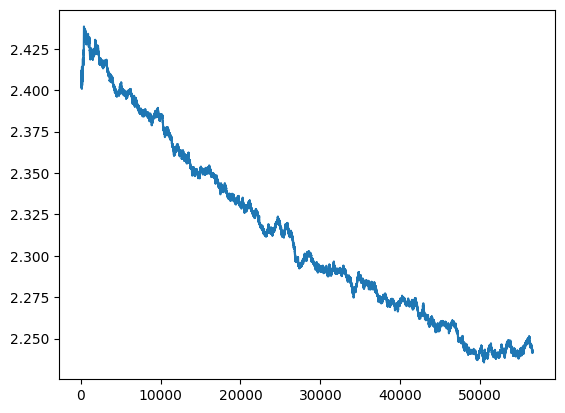

In [ ]:
pd.Series(losses).ewm(1000).mean()[100:].plot();

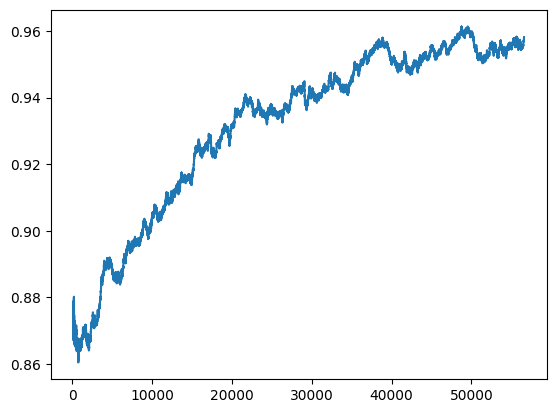

In [ ]:
pd.Series(accuracies).ewm(1000).mean()[100:].plot();

In [ ]:
NEW_MODEL_NAME = 'labse_bur'
model.save_pretrained(NEW_MODEL_NAME)
tokenizer.save_pretrained(NEW_MODEL_NAME)

('labse_bur/tokenizer_config.json',
 'labse_bur/special_tokens_map.json',
 'labse_bur/vocab.txt',
 'labse_bur/added_tokens.json')

In [ ]:
model.train()
tq = trange(50_000)
for i in tq:
    bur, ru = [list(p) for p in zip(*random.choices(pairs, k=batch_size))]
    try:
        batch = tokenizer(ru+bur, return_tensors='pt', padding=True, truncation=True, max_length=128).to(model.device)
        out = model.bert(**batch, output_hidden_states=True)
        embeddings = torch.nn.functional.normalize(out.pooler_output)
        all_scores = torch.matmul(
            embeddings[:batch_size].detach(), # keep Russian embeddings frozen
            embeddings[batch_size:].T  # update buryat embeddings
        ) - torch.eye(batch_size, device=model.device) * margin
        loss = loss_fn(all_scores, torch.arange(batch_size, device=model.device)) + loss_fn(all_scores.T, torch.arange(batch_size, device=model.device))

        loss.backward()
        optimizer.step()
        optimizer.zero_grad(set_to_none=True)
        losses.append(loss.item())
        accuracies.append(get_acc(embeddings))
    except RuntimeError:
        optimizer.zero_grad(set_to_none=True)
        batch, out, embeddings, all_scores, loss = None, None, None, None, None
        cleanup()
        print('error', max(len(s) for s in bur+ru))
        continue
    if i % 100 == 0:
        print(i, np.mean(losses[-100:]), np.mean(accuracies[-100:]))

  0%|          | 2/50000 [00:00<1:58:13,  7.05it/s]

0 2.211946377754211 0.98375


  0%|          | 104/50000 [00:08<1:01:41, 13.48it/s]

100 2.2011186158657075 0.965


  0%|          | 203/50000 [00:13<43:04, 19.27it/s]

200 2.2179179990291598 0.9525


  1%|          | 302/50000 [00:19<41:16, 20.07it/s]

300 2.244237641096115 0.9325


  1%|          | 403/50000 [00:24<40:32, 20.39it/s]

400 2.240417844057083 0.95125


  1%|          | 503/50000 [00:30<49:35, 16.63it/s]

500 2.21102722287178 0.95875


  1%|          | 604/50000 [00:36<47:39, 17.28it/s]

600 2.19932066321373 0.9525


  1%|▏         | 705/50000 [00:41<40:35, 20.24it/s]

700 2.2617397940158845 0.94375


  2%|▏         | 805/50000 [00:47<40:06, 20.44it/s]

800 2.2329453051090242 0.9625


  2%|▏         | 903/50000 [00:52<40:53, 20.01it/s]

900 2.2104319667816164 0.9525


  2%|▏         | 1003/50000 [00:57<50:14, 16.25it/s]

1000 2.250005408525467 0.965


  2%|▏         | 1104/50000 [01:03<40:47, 19.98it/s]

1100 2.214016761779785 0.95625


  2%|▏         | 1203/50000 [01:08<42:24, 19.18it/s]

1200 2.2422680079936983 0.93875


  3%|▎         | 1303/50000 [01:14<39:54, 20.34it/s]

1300 2.247891881465912 0.9875


  3%|▎         | 1402/50000 [01:19<51:35, 15.70it/s]

1400 2.2079269850254057 0.9675


  3%|▎         | 1504/50000 [01:28<52:30, 15.39it/s]

1500 2.240543313026428 0.94875


  3%|▎         | 1602/50000 [01:33<39:01, 20.67it/s]

1600 2.249858329296112 0.97875


  3%|▎         | 1703/50000 [01:39<51:30, 15.63it/s]

1700 2.211406416893005 0.9475


  4%|▎         | 1802/50000 [01:44<38:29, 20.87it/s]

1800 2.2202153742313384 0.95875


  4%|▍         | 1904/50000 [01:49<39:32, 20.28it/s]

1900 2.2442080819606782 0.945


  4%|▍         | 2003/50000 [01:56<42:53, 18.65it/s]

2000 2.238118268251419 0.94875


  4%|▍         | 2104/50000 [02:01<40:20, 19.79it/s]

2100 2.2202835273742676 0.95875


  4%|▍         | 2203/50000 [02:06<49:56, 15.95it/s]

2200 2.2394238579273225 0.93875


  5%|▍         | 2304/50000 [02:11<39:22, 20.18it/s]

2300 2.2096314680576326 0.96


  5%|▍         | 2403/50000 [02:17<41:36, 19.07it/s]

2400 2.2219529974460603 0.94875


  5%|▌         | 2503/50000 [02:22<40:52, 19.37it/s]

2500 2.2250598537921906 0.9575


  5%|▌         | 2604/50000 [02:28<47:20, 16.69it/s]

2600 2.2203925919532774 0.96


  5%|▌         | 2704/50000 [02:34<47:59, 16.43it/s]

2700 2.244216343164444 0.9675


  6%|▌         | 2803/50000 [02:39<45:13, 17.40it/s]

2800 2.2338225865364074 0.95


  6%|▌         | 2903/50000 [02:44<39:29, 19.87it/s]

2900 2.2141612923145293 0.9525


  6%|▌         | 3003/50000 [02:50<41:41, 18.79it/s]

3000 2.2413940584659575 0.9625


  6%|▌         | 3103/50000 [02:56<51:41, 15.12it/s]

3100 2.243739849328995 0.94875


  6%|▋         | 3204/50000 [03:03<37:23, 20.86it/s]

3200 2.215345959663391 0.96375


  7%|▋         | 3303/50000 [03:08<39:36, 19.65it/s]

3300 2.2142052006721498 0.95375


  7%|▋         | 3403/50000 [03:13<44:41, 17.38it/s]

3400 2.2409473979473113 0.955


  7%|▋         | 3504/50000 [03:19<39:52, 19.44it/s]

3500 2.223446125984192 0.95375


  7%|▋         | 3604/50000 [03:24<38:07, 20.28it/s]

3600 2.236600110530853 0.96125


  7%|▋         | 3704/50000 [03:30<47:36, 16.21it/s]

3700 2.234992901086807 0.94


  8%|▊         | 3803/50000 [03:35<37:54, 20.31it/s]

3800 2.238832267522812 0.965


  8%|▊         | 3904/50000 [03:41<46:17, 16.60it/s]

3900 2.2251271772384644 0.9475


  8%|▊         | 4003/50000 [03:46<41:01, 18.69it/s]

4000 2.217045785188675 0.965


  8%|▊         | 4104/50000 [03:51<40:18, 18.98it/s]

4100 2.2107155549526216 0.95125


  8%|▊         | 4204/50000 [03:57<41:05, 18.57it/s]

4200 2.2026202285289767 0.93375


  9%|▊         | 4304/50000 [04:02<39:41, 19.19it/s]

4300 2.229144606590271 0.96


  9%|▉         | 4402/50000 [04:07<45:35, 16.67it/s]

4400 2.2300119280815123 0.98125


  9%|▉         | 4503/50000 [04:13<36:37, 20.70it/s]

4500 2.249936661720276 0.9475


  9%|▉         | 4604/50000 [04:18<38:20, 19.73it/s]

4600 2.2338591063022615 0.95875


  9%|▉         | 4703/50000 [04:24<39:53, 18.92it/s]

4700 2.2474648356437683 0.96875


 10%|▉         | 4804/50000 [04:29<43:04, 17.49it/s]

4800 2.2164597010612486 0.94375


 10%|▉         | 4904/50000 [04:35<43:55, 17.11it/s]

4900 2.2198665606975556 0.945


 10%|█         | 5003/50000 [04:40<37:10, 20.17it/s]

5000 2.2200697088241577 0.965


 10%|█         | 5105/50000 [04:45<37:14, 20.09it/s]

5100 2.252786101102829 0.95625


 10%|█         | 5203/50000 [04:51<41:32, 17.97it/s]

5200 2.2500886058807374 0.95


 11%|█         | 5304/50000 [04:56<38:02, 19.58it/s]

5300 2.2119561779499053 0.94875


 11%|█         | 5403/50000 [05:01<44:26, 16.73it/s]

5400 2.2469790172576904 0.955


 11%|█         | 5504/50000 [05:07<34:58, 21.20it/s]

5500 2.232798149585724 0.97


 11%|█         | 5603/50000 [05:12<39:40, 18.65it/s]

5600 2.2634407091140747 0.95


 11%|█▏        | 5703/50000 [05:18<40:54, 18.05it/s]

5700 2.243518191576004 0.9525


 12%|█▏        | 5803/50000 [05:23<37:08, 19.83it/s]

5800 2.24165042757988 0.965


 12%|█▏        | 5903/50000 [05:28<45:20, 16.21it/s]

5900 2.2220153760910035 0.96875


 12%|█▏        | 6004/50000 [05:34<38:57, 18.82it/s]

6000 2.2178825688362123 0.965


 12%|█▏        | 6105/50000 [05:39<36:43, 19.92it/s]

6100 2.2275885128974915 0.965


 12%|█▏        | 6203/50000 [05:45<38:13, 19.10it/s]

6200 2.2124048137664794 0.945


 13%|█▎        | 6305/50000 [05:50<36:55, 19.72it/s]

6300 2.207036660909653 0.96875


 13%|█▎        | 6402/50000 [05:56<44:12, 16.44it/s]

6400 2.1816125094890593 0.96125


 13%|█▎        | 6505/50000 [06:01<35:56, 20.17it/s]

6500 2.198124474287033 0.9325


 13%|█▎        | 6604/50000 [06:06<38:21, 18.85it/s]

6600 2.224249268770218 0.95375


 13%|█▎        | 6705/50000 [06:12<35:40, 20.22it/s]

6700 2.2621800231933595 0.94375


 14%|█▎        | 6804/50000 [06:17<41:20, 17.42it/s]

6800 2.2199367010593414 0.95625


 14%|█▍        | 6903/50000 [06:23<44:28, 16.15it/s]

6900 2.184752641916275 0.96875


 14%|█▍        | 7003/50000 [06:28<35:24, 20.24it/s]

7000 2.2653509092330935 0.93625


 14%|█▍        | 7104/50000 [06:34<42:32, 16.80it/s]

7100 2.230140311717987 0.965


 14%|█▍        | 7204/50000 [06:40<38:08, 18.70it/s]

7200 2.2144872796535493 0.94875


 15%|█▍        | 7304/50000 [06:45<34:14, 20.78it/s]

7300 2.24335431098938 0.97125


 15%|█▍        | 7404/50000 [06:50<42:56, 16.54it/s]

7400 2.23278725028038 0.9475


 15%|█▌        | 7503/50000 [06:55<34:49, 20.34it/s]

7500 2.25299339056015 0.96125


 15%|█▌        | 7605/50000 [07:01<34:17, 20.61it/s]

7600 2.2157258117198944 0.9625


 15%|█▌        | 7703/50000 [07:06<38:10, 18.47it/s]

7700 2.207766795158386 0.95875


 16%|█▌        | 7804/50000 [07:12<38:43, 18.16it/s]

7800 2.220342947244644 0.9775


 16%|█▌        | 7904/50000 [07:17<43:47, 16.02it/s]

7900 2.2093464863300323 0.9575


 16%|█▌        | 8004/50000 [07:23<36:00, 19.44it/s]

8000 2.211372117996216 0.97375


 16%|█▌        | 8105/50000 [07:28<34:20, 20.33it/s]

8100 2.224172292947769 0.9575


 16%|█▋        | 8204/50000 [07:34<44:07, 15.79it/s]

8200 2.2318749725818634 0.9725


 17%|█▋        | 8302/50000 [07:39<33:40, 20.64it/s]

8300 2.2485030937194823 0.96125


 17%|█▋        | 8404/50000 [07:45<44:20, 15.63it/s]

8400 2.212569681406021 0.9575


 17%|█▋        | 8503/50000 [07:50<36:49, 18.78it/s]

8500 2.2258064103126527 0.9675


 17%|█▋        | 8603/50000 [07:55<35:11, 19.60it/s]

8600 2.2254244697093966 0.95125


 17%|█▋        | 8703/50000 [08:01<33:03, 20.83it/s]

8700 2.2280468356609346 0.9625


 18%|█▊        | 8805/50000 [08:06<32:14, 21.29it/s]

8800 2.1975591659545897 0.965


 18%|█▊        | 8904/50000 [08:11<40:04, 17.09it/s]

8900 2.1854731965065004 0.955


 18%|█▊        | 9003/50000 [08:17<36:59, 18.47it/s]

9000 2.1923502826690675 0.965


 18%|█▊        | 9103/50000 [08:22<35:42, 19.09it/s]

9100 2.21636234164238 0.95875


 18%|█▊        | 9205/50000 [08:28<32:31, 20.91it/s]

9200 2.249831951856613 0.9825


 19%|█▊        | 9303/50000 [08:35<55:03, 12.32it/s]

9300 2.211176438331604 0.9725


 19%|█▉        | 9403/50000 [08:43<43:36, 15.51it/s]

9400 2.2064322805404664 0.9575


 19%|█▉        | 9503/50000 [08:50<33:29, 20.15it/s]

9500 2.198897763490677 0.95625


 19%|█▉        | 9604/50000 [08:55<32:20, 20.82it/s]

9600 2.1939428555965423 0.95875


 19%|█▉        | 9704/50000 [09:01<34:51, 19.26it/s]

9700 2.2300867903232575 0.96625


 20%|█▉        | 9803/50000 [09:06<43:11, 15.51it/s]

9800 2.220470449924469 0.9625


 20%|█▉        | 9903/50000 [09:12<37:02, 18.04it/s]

9900 2.22882754445076 0.96875


 20%|██        | 10004/50000 [09:17<35:50, 18.60it/s]

10000 2.200507392883301 0.95375


 20%|██        | 10105/50000 [09:23<32:26, 20.50it/s]

10100 2.2011466801166533 0.955


 20%|██        | 10203/50000 [09:28<33:39, 19.71it/s]

10200 2.2307891047000883 0.96625


 21%|██        | 10303/50000 [09:33<46:11, 14.32it/s]

10300 2.1981152522563936 0.94625


 21%|██        | 10404/50000 [09:40<33:29, 19.71it/s]

10400 2.2372554576396944 0.94625


 21%|██        | 10502/50000 [09:44<32:15, 20.41it/s]

10500 2.255134229660034 0.95875


 21%|██        | 10604/50000 [09:50<40:57, 16.03it/s]

10600 2.1916399991512296 0.94125


 21%|██▏       | 10704/50000 [09:55<33:23, 19.62it/s]

10700 2.2241295552253724 0.95625


 22%|██▏       | 10804/50000 [10:00<33:42, 19.38it/s]

10800 2.2054243016242983 0.9625


 22%|██▏       | 10904/50000 [10:06<31:12, 20.88it/s]

10900 2.267362576723099 0.95625


 22%|██▏       | 11005/50000 [10:11<32:08, 20.22it/s]

11000 2.2295633113384246 0.95375


 22%|██▏       | 11103/50000 [10:17<41:19, 15.69it/s]

11100 2.226417052745819 0.9625


 22%|██▏       | 11205/50000 [10:22<32:55, 19.64it/s]

11200 2.264440801143646 0.96


 23%|██▎       | 11304/50000 [10:27<31:43, 20.32it/s]

11300 2.225356180667877 0.96


 23%|██▎       | 11404/50000 [10:33<40:20, 15.94it/s]

11400 2.1664753484725954 0.97


 23%|██▎       | 11503/50000 [10:39<31:57, 20.08it/s]

11500 2.2080546128749847 0.9825


 23%|██▎       | 11604/50000 [10:44<41:57, 15.25it/s]

11600 2.2200328063964845 0.9475


 23%|██▎       | 11704/50000 [10:50<32:47, 19.46it/s]

11700 2.2306061720848085 0.965


 24%|██▎       | 11804/50000 [10:55<34:34, 18.41it/s]

11800 2.2191569328308107 0.94375


 24%|██▍       | 11904/50000 [11:01<32:49, 19.34it/s]

11900 2.220087881088257 0.965


 24%|██▍       | 12003/50000 [11:06<31:42, 19.97it/s]

12000 2.2286641788482666 0.95


 24%|██▍       | 12103/50000 [11:11<42:11, 14.97it/s]

12100 2.203277925252914 0.94875


 24%|██▍       | 12205/50000 [11:16<31:30, 19.99it/s]

12200 2.177685232162476 0.95125


 25%|██▍       | 12304/50000 [11:21<31:43, 19.81it/s]

12300 2.2110754907131196 0.96375


 25%|██▍       | 12403/50000 [11:27<33:07, 18.92it/s]

12400 2.2148421561717986 0.96


 25%|██▌       | 12503/50000 [11:32<35:37, 17.55it/s]

12500 2.2531825506687166 0.96


 25%|██▌       | 12603/50000 [11:39<40:19, 15.46it/s]

12600 2.2168884801864626 0.93


 25%|██▌       | 12702/50000 [11:44<31:18, 19.86it/s]

12700 2.209636468887329 0.96375


 26%|██▌       | 12803/50000 [11:49<34:14, 18.11it/s]

12800 2.2215115201473234 0.94875


 26%|██▌       | 12904/50000 [11:55<31:54, 19.38it/s]

12900 2.213726463317871 0.9375


 26%|██▌       | 13004/50000 [12:00<31:16, 19.71it/s]

13000 2.220656536817551 0.98125


 26%|██▌       | 13103/50000 [12:06<40:05, 15.34it/s]

13100 2.215259828567505 0.95375


 26%|██▋       | 13204/50000 [12:11<30:18, 20.23it/s]

13200 2.202297523021698 0.95125


 27%|██▋       | 13303/50000 [12:16<30:13, 20.23it/s]

13300 2.1870162415504457 0.94125


 27%|██▋       | 13404/50000 [12:21<31:04, 19.63it/s]

13400 2.196961681842804 0.94625


 27%|██▋       | 13502/50000 [12:26<30:08, 20.18it/s]

13500 2.2335954904556274 0.93875


 27%|██▋       | 13604/50000 [12:32<39:41, 15.29it/s]

13600 2.209098333120346 0.97


 27%|██▋       | 13704/50000 [12:38<29:57, 20.20it/s]

13700 2.2261777353286742 0.9625


 28%|██▊       | 13802/50000 [12:43<29:23, 20.53it/s]

13800 2.2042621254920958 0.97375


 28%|██▊       | 13904/50000 [12:49<31:47, 18.92it/s]

13900 2.227231019735336 0.965


 28%|██▊       | 14004/50000 [12:54<29:23, 20.41it/s]

14000 2.2546993243694304 0.9575


 28%|██▊       | 14104/50000 [13:00<37:32, 15.94it/s]

14100 2.224366247653961 0.96375


 28%|██▊       | 14202/50000 [13:05<28:21, 21.04it/s]

14200 2.2049934804439544 0.94125


 29%|██▊       | 14303/50000 [13:10<28:42, 20.73it/s]

14300 2.236705127954483 0.9625


 29%|██▉       | 14405/50000 [13:16<29:28, 20.12it/s]

14400 2.1943789172172545 0.955


 29%|██▉       | 14505/50000 [13:21<30:33, 19.36it/s]

14500 2.2147916996479036 0.965


 29%|██▉       | 14604/50000 [13:26<36:54, 15.98it/s]

14600 2.1655370104312897 0.94875


 29%|██▉       | 14703/50000 [13:31<31:18, 18.79it/s]

14700 2.185181850194931 0.97


 30%|██▉       | 14803/50000 [13:37<32:31, 18.04it/s]

14800 2.2002860248088836 0.96


 30%|██▉       | 14903/50000 [13:43<28:55, 20.23it/s]

14900 2.217973209619522 0.9575


 30%|███       | 15004/50000 [13:48<29:51, 19.53it/s]

15000 2.206302505731583 0.97125


 30%|███       | 15104/50000 [13:54<35:00, 16.61it/s]

15100 2.2077085900306703 0.95125


 30%|███       | 15204/50000 [13:59<27:35, 21.01it/s]

15200 2.2127314960956572 0.945


 31%|███       | 15303/50000 [14:04<30:49, 18.76it/s]

15300 2.2279565036296844 0.98125


 31%|███       | 15404/50000 [14:09<28:51, 19.98it/s]

15400 2.211505861282349 0.96625


 31%|███       | 15503/50000 [14:14<27:50, 20.65it/s]

15500 2.1963365340232848 0.95


 31%|███       | 15603/50000 [14:20<34:23, 16.67it/s]

15600 2.2138344967365264 0.9575


 31%|███▏      | 15702/50000 [14:25<27:23, 20.86it/s]

15700 2.194940322637558 0.955


 32%|███▏      | 15804/50000 [14:30<30:51, 18.47it/s]

15800 2.2063003993034362 0.94375


 32%|███▏      | 15903/50000 [14:37<35:10, 16.16it/s]

15900 2.19300253033638 0.94625


 32%|███▏      | 16003/50000 [14:42<27:24, 20.67it/s]

16000 2.198716434240341 0.96875


 32%|███▏      | 16104/50000 [14:48<36:27, 15.49it/s]

16100 2.232595624923706 0.9625


 32%|███▏      | 16205/50000 [14:53<28:39, 19.65it/s]

16200 2.159985740184784 0.9525


 33%|███▎      | 16305/50000 [14:58<29:00, 19.36it/s]

16300 2.240772569179535 0.95875


 33%|███▎      | 16402/50000 [15:04<29:51, 18.75it/s]

16400 2.2123284518718718 0.935


 33%|███▎      | 16503/50000 [15:09<30:39, 18.21it/s]

16500 2.2140378558635714 0.96


 33%|███▎      | 16603/50000 [15:15<35:09, 15.83it/s]

16600 2.195786988735199 0.9675


 33%|███▎      | 16703/50000 [15:20<27:39, 20.07it/s]

16700 2.21119007229805 0.9525


 34%|███▎      | 16802/50000 [15:25<30:22, 18.22it/s]

16800 2.1899941778182983 0.97625


 34%|███▍      | 16902/50000 [15:31<27:07, 20.34it/s]

16900 2.1975683689117433 0.9575


 34%|███▍      | 17004/50000 [15:36<29:04, 18.91it/s]

17000 2.2074580883979795 0.9575


 34%|███▍      | 17104/50000 [15:42<37:00, 14.82it/s]

17100 2.2179692924022674 0.965


 34%|███▍      | 17205/50000 [15:47<27:33, 19.84it/s]

17200 2.2281863951683043 0.97375


 35%|███▍      | 17304/50000 [15:52<26:48, 20.33it/s]

17300 2.1888071846961976 0.94875


 35%|███▍      | 17404/50000 [15:58<29:24, 18.47it/s]

17400 2.177186473608017 0.96125


 35%|███▌      | 17503/50000 [16:03<30:22, 17.83it/s]

17500 2.2281327950954437 0.95125


 35%|███▌      | 17604/50000 [16:09<34:27, 15.67it/s]

17600 2.203357038497925 0.955


 35%|███▌      | 17703/50000 [16:14<27:59, 19.22it/s]

17700 2.2388745939731596 0.94125


 36%|███▌      | 17803/50000 [16:19<25:52, 20.74it/s]

17800 2.2085856878757477 0.96625


 36%|███▌      | 17903/50000 [16:25<26:03, 20.53it/s]

17900 2.1997872507572174 0.97125


 36%|███▌      | 18004/50000 [16:30<30:13, 17.64it/s]

18000 2.2285171937942505 0.95875


 36%|███▌      | 18103/50000 [16:37<41:24, 12.84it/s]

18100 2.200339903831482 0.96


 36%|███▋      | 18204/50000 [16:42<24:58, 21.21it/s]

18200 2.209682958126068 0.9675


 37%|███▋      | 18303/50000 [16:47<26:32, 19.91it/s]

18300 2.21992072224617 0.95375


 37%|███▋      | 18403/50000 [16:53<26:56, 19.55it/s]

18400 2.1889892983436585 0.97


 37%|███▋      | 18503/50000 [16:58<27:23, 19.16it/s]

18500 2.2089615213871 0.97125


 37%|███▋      | 18604/50000 [17:03<29:59, 17.45it/s]

18600 2.201427175998688 0.96375


 37%|███▋      | 18704/50000 [17:09<25:35, 20.38it/s]

18700 2.221397718191147 0.95625


 38%|███▊      | 18803/50000 [17:14<26:42, 19.47it/s]

18800 2.225062141418457 0.9525


 38%|███▊      | 18903/50000 [17:20<24:49, 20.87it/s]

18900 2.217787199020386 0.96


 38%|███▊      | 19003/50000 [17:25<24:46, 20.86it/s]

19000 2.2038640093803408 0.96375


 38%|███▊      | 19103/50000 [17:30<30:57, 16.64it/s]

19100 2.2145999443531035 0.94125


 38%|███▊      | 19203/50000 [17:36<26:57, 19.04it/s]

19200 2.2108091032505035 0.965


 39%|███▊      | 19305/50000 [17:42<23:59, 21.33it/s]

19300 2.21176074385643 0.9625


 39%|███▉      | 19403/50000 [17:47<26:08, 19.50it/s]

19400 2.190009924173355 0.98375


 39%|███▉      | 19505/50000 [17:52<25:09, 20.20it/s]

19500 2.1809546720981596 0.9725


 39%|███▉      | 19604/50000 [17:57<31:26, 16.11it/s]

19600 2.2144091379642488 0.97875


 39%|███▉      | 19704/50000 [18:03<24:25, 20.67it/s]

19700 2.2352902090549467 0.9575


 40%|███▉      | 19802/50000 [18:08<25:51, 19.46it/s]

19800 2.2076722514629363 0.9575


 40%|███▉      | 19904/50000 [18:13<25:08, 19.95it/s]

19900 2.183661322593689 0.9575


 40%|████      | 20003/50000 [18:18<23:01, 21.71it/s]

20000 2.190531392097473 0.9525


 40%|████      | 20104/50000 [18:24<28:36, 17.41it/s]

20100 2.195489284992218 0.96875


 40%|████      | 20202/50000 [18:29<24:15, 20.47it/s]

20200 2.2026691913604735 0.96625


 41%|████      | 20303/50000 [18:35<30:20, 16.31it/s]

20300 2.1641185092926025 0.9725


 41%|████      | 20404/50000 [18:40<27:12, 18.12it/s]

20400 2.2321371364593507 0.97625


 41%|████      | 20504/50000 [18:46<25:55, 18.97it/s]

20500 2.2041660988330842 0.9525


 41%|████      | 20603/50000 [18:51<28:28, 17.20it/s]

20600 2.1854738068580626 0.96


 41%|████▏     | 20705/50000 [18:56<23:02, 21.19it/s]

20700 2.1895209765434265 0.9675


 42%|████▏     | 20803/50000 [19:01<24:47, 19.62it/s]

20800 2.229226269721985 0.95125


 42%|████▏     | 20905/50000 [19:07<24:01, 20.18it/s]

20900 2.225744433403015 0.935


 42%|████▏     | 21002/50000 [19:12<23:48, 20.31it/s]

21000 2.186072545051575 0.95375


 42%|████▏     | 21103/50000 [19:17<26:43, 18.02it/s]

21100 2.193342536687851 0.955


 42%|████▏     | 21202/50000 [19:23<23:12, 20.69it/s]

21200 2.2004372656345366 0.9675


 43%|████▎     | 21303/50000 [19:28<25:27, 18.79it/s]

21300 2.2404501366615297 0.9525


 43%|████▎     | 21403/50000 [19:34<35:09, 13.56it/s]

21400 2.1912720346450807 0.96375


 43%|████▎     | 21505/50000 [19:40<23:12, 20.46it/s]

21500 2.1881787836551667 0.95875


 43%|████▎     | 21604/50000 [19:44<22:39, 20.88it/s]

21600 2.200604442358017 0.96375


 43%|████▎     | 21704/50000 [19:50<26:06, 18.07it/s]

21700 2.1560809230804443 0.95375


 44%|████▎     | 21804/50000 [19:55<24:35, 19.11it/s]

21800 2.1839723885059357 0.96875


 44%|████▍     | 21904/50000 [20:01<30:52, 15.17it/s]

21900 2.1845344042778017 0.95375


 44%|████▍     | 22004/50000 [20:06<25:37, 18.21it/s]

22000 2.187482852935791 0.97125


 44%|████▍     | 22104/50000 [20:11<22:40, 20.50it/s]

22100 2.199482935667038 0.965


 44%|████▍     | 22204/50000 [20:17<23:47, 19.47it/s]

22200 2.222907819747925 0.95625


 45%|████▍     | 22303/50000 [20:22<21:50, 21.13it/s]

22300 2.193880603313446 0.95625


 45%|████▍     | 22403/50000 [20:27<27:26, 16.76it/s]

22400 2.219394112825394 0.955


 45%|████▌     | 22504/50000 [20:33<26:50, 17.07it/s]

22500 2.1984752345085146 0.98


 45%|████▌     | 22604/50000 [20:38<23:18, 19.59it/s]

22600 2.1909463798999784 0.95125


 45%|████▌     | 22703/50000 [20:44<22:01, 20.65it/s]

22700 2.1887563347816466 0.96


 46%|████▌     | 22803/50000 [20:49<21:52, 20.72it/s]

22800 2.159165954589844 0.94125


 46%|████▌     | 22903/50000 [20:54<28:19, 15.94it/s]

22900 2.198134925365448 0.95875


 46%|████▌     | 23004/50000 [21:00<24:34, 18.31it/s]

23000 2.155601943731308 0.97


 46%|████▌     | 23104/50000 [21:05<23:48, 18.82it/s]

23100 2.181923966407776 0.97875


 46%|████▋     | 23203/50000 [21:10<21:43, 20.55it/s]

23200 2.1909312641620637 0.9725


 47%|████▋     | 23304/50000 [21:16<23:48, 18.69it/s]

23300 2.169424830675125 0.975


 47%|████▋     | 23404/50000 [21:21<26:05, 16.99it/s]

23400 2.178301304578781 0.94375


 47%|████▋     | 23504/50000 [21:26<22:50, 19.33it/s]

23500 2.176308355331421 0.96625


 47%|████▋     | 23604/50000 [21:32<21:56, 20.06it/s]

23600 2.1900983023643494 0.9725


 47%|████▋     | 23704/50000 [21:38<27:03, 16.20it/s]

23700 2.1619629144668577 0.94875


 48%|████▊     | 23804/50000 [21:43<21:12, 20.59it/s]

23800 2.240117553472519 0.95875


 48%|████▊     | 23904/50000 [21:49<25:46, 16.88it/s]

23900 2.2052737963199616 0.9725


 48%|████▊     | 24003/50000 [21:54<22:04, 19.62it/s]

24000 2.1588868534564973 0.96


 48%|████▊     | 24105/50000 [21:59<21:21, 20.20it/s]

24100 2.1827219915390015 0.95


 48%|████▊     | 24202/50000 [22:05<27:50, 15.44it/s]

24200 2.1908696341514586 0.955


 49%|████▊     | 24304/50000 [22:10<21:45, 19.69it/s]

24300 2.19918461561203 0.97375


 49%|████▉     | 24403/50000 [22:15<21:41, 19.66it/s]

24400 2.2023549580574038 0.95875


 49%|████▉     | 24503/50000 [22:21<20:58, 20.26it/s]

24500 2.204012851715088 0.9725


 49%|████▉     | 24604/50000 [22:26<22:08, 19.11it/s]

24600 2.167583738565445 0.96875


 49%|████▉     | 24704/50000 [22:31<26:31, 15.89it/s]

24700 2.2088160622119903 0.96125


 50%|████▉     | 24803/50000 [22:37<20:40, 20.31it/s]

24800 2.175969578027725 0.95875


 50%|████▉     | 24904/50000 [22:42<23:22, 17.90it/s]

24900 2.1824298322200777 0.9625


 50%|█████     | 25002/50000 [22:48<21:03, 19.78it/s]

25000 2.2296735513210297 0.97125


 50%|█████     | 25103/50000 [22:53<22:27, 18.48it/s]

25100 2.1952930521965026 0.9575


 50%|█████     | 25203/50000 [22:59<27:03, 15.28it/s]

25200 2.168086439371109 0.96


 51%|█████     | 25304/50000 [23:04<22:09, 18.57it/s]

25300 2.176825569868088 0.94875


 51%|█████     | 25403/50000 [23:09<24:14, 16.91it/s]

25400 2.193305051326752 0.92


 51%|█████     | 25504/50000 [23:15<22:37, 18.04it/s]

25500 2.171720222234726 0.96375


 51%|█████     | 25605/50000 [23:20<19:56, 20.39it/s]

25600 2.1925555527210236 0.96


 51%|█████▏    | 25703/50000 [23:25<24:38, 16.43it/s]

25700 2.19797462105751 0.95


 52%|█████▏    | 25805/50000 [23:30<18:51, 21.39it/s]

25800 2.162967789173126 0.94


 52%|█████▏    | 25903/50000 [23:36<23:53, 16.81it/s]

25900 2.2116945397853853 0.95125


 52%|█████▏    | 26004/50000 [23:42<21:07, 18.93it/s]

26000 2.187885528802872 0.95


 52%|█████▏    | 26102/50000 [23:47<20:15, 19.66it/s]

26100 2.196067163944244 0.95125


 52%|█████▏    | 26204/50000 [23:53<24:54, 15.92it/s]

26200 2.1953491830825804 0.9475


 53%|█████▎    | 26304/50000 [23:58<20:02, 19.71it/s]

26300 2.217641875743866 0.945


 53%|█████▎    | 26403/50000 [24:02<19:03, 20.63it/s]

26400 2.202317500114441 0.96375


 53%|█████▎    | 26504/50000 [24:08<20:19, 19.27it/s]

26500 2.219930506944656 0.9475


 53%|█████▎    | 26604/50000 [24:14<21:55, 17.78it/s]

26600 2.1841835737228394 0.95


 53%|█████▎    | 26703/50000 [24:19<24:52, 15.61it/s]

26700 2.1773476076126097 0.96875


 54%|█████▎    | 26804/50000 [24:24<19:11, 20.15it/s]

26800 2.1600050175189973 0.955


 54%|█████▍    | 26904/50000 [24:29<19:51, 19.39it/s]

26900 2.191296902894974 0.97


 54%|█████▍    | 27003/50000 [24:36<25:20, 15.13it/s]

27000 2.1687853264808656 0.96625


 54%|█████▍    | 27104/50000 [24:41<19:17, 19.79it/s]

27100 2.188359572887421 0.96125


 54%|█████▍    | 27204/50000 [24:47<22:06, 17.18it/s]

27200 2.155971645116806 0.96875


 55%|█████▍    | 27304/50000 [24:52<19:16, 19.62it/s]

27300 2.1688732504844666 0.95


 55%|█████▍    | 27404/50000 [24:57<18:43, 20.12it/s]

27400 2.1878353142738343 0.9675


 55%|█████▌    | 27502/50000 [25:03<19:31, 19.20it/s]

27500 2.18055198431015 0.965


 55%|█████▌    | 27603/50000 [25:08<19:58, 18.68it/s]

27600 2.181786141395569 0.9625


 55%|█████▌    | 27703/50000 [25:13<23:27, 15.84it/s]

27700 2.214929655790329 0.9525


 56%|█████▌    | 27805/50000 [25:19<17:55, 20.63it/s]

27800 2.2122983372211458 0.97375


 56%|█████▌    | 27905/50000 [25:24<18:09, 20.28it/s]

27900 2.191413788795471 0.96125


 56%|█████▌    | 28003/50000 [25:30<17:37, 20.81it/s]

28000 2.2112172853946688 0.96


 56%|█████▌    | 28104/50000 [25:35<18:38, 19.58it/s]

28100 2.175645112991333 0.96125


 56%|█████▋    | 28202/50000 [25:41<23:41, 15.33it/s]

28200 2.196954083442688 0.95125


 57%|█████▋    | 28304/50000 [25:46<18:13, 19.84it/s]

28300 2.2035061597824095 0.9525


 57%|█████▋    | 28404/50000 [25:51<17:57, 20.04it/s]

28400 2.1771686947345734 0.96125


 57%|█████▋    | 28503/50000 [25:57<17:00, 21.06it/s]

28500 2.1914127242565153 0.9525


 57%|█████▋    | 28605/50000 [26:02<18:40, 19.10it/s]

28600 2.1622993540763855 0.94625


 57%|█████▋    | 28703/50000 [26:07<21:22, 16.60it/s]

28700 2.1796190989017488 0.9725


 58%|█████▊    | 28804/50000 [26:13<17:54, 19.73it/s]

28800 2.1763004648685453 0.98


 58%|█████▊    | 28905/50000 [26:18<18:18, 19.20it/s]

28900 2.1837027633190154 0.9675


 58%|█████▊    | 29005/50000 [26:24<17:08, 20.40it/s]

29000 2.1667734611034395 0.96375


 58%|█████▊    | 29103/50000 [26:29<19:02, 18.30it/s]

29100 2.194559881687164 0.9575


 58%|█████▊    | 29203/50000 [26:35<21:06, 16.42it/s]

29200 2.245579780340195 0.935


 59%|█████▊    | 29303/50000 [26:41<18:27, 18.68it/s]

29300 2.1726819705963134 0.97


 59%|█████▉    | 29403/50000 [26:46<18:51, 18.20it/s]

29400 2.2095850813388824 0.95125


 59%|█████▉    | 29504/50000 [26:52<17:13, 19.83it/s]

29500 2.1534764051437376 0.955


 59%|█████▉    | 29605/50000 [26:57<16:35, 20.49it/s]

29600 2.1972429871559145 0.96


 59%|█████▉    | 29704/50000 [27:02<19:35, 17.26it/s]

29700 2.182799220085144 0.96


 60%|█████▉    | 29803/50000 [27:07<18:17, 18.40it/s]

29800 2.1948876762390137 0.96375


 60%|█████▉    | 29905/50000 [27:12<15:34, 21.50it/s]

29900 2.2073601961135862 0.9575


 60%|██████    | 30003/50000 [27:18<17:54, 18.61it/s]

30000 2.1938758063316346 0.94125


 60%|██████    | 30103/50000 [27:23<15:58, 20.75it/s]

30100 2.1973974895477295 0.9675


 60%|██████    | 30204/50000 [27:29<21:00, 15.71it/s]

30200 2.1583951461315154 0.94875


 61%|██████    | 30305/50000 [27:35<18:03, 18.17it/s]

30300 2.1917336130142213 0.94375


 61%|██████    | 30404/50000 [27:40<16:08, 20.24it/s]

30400 2.1929935681819916 0.95875


 61%|██████    | 30502/50000 [27:46<19:40, 16.52it/s]

30500 2.192840007543564 0.96375


 61%|██████    | 30602/50000 [27:51<15:50, 20.42it/s]

30600 2.172682353258133 0.9475


 61%|██████▏   | 30703/50000 [27:56<16:50, 19.10it/s]

30700 2.1818327379226683 0.96875


 62%|██████▏   | 30804/50000 [28:01<16:52, 18.96it/s]

30800 2.18614759683609 0.94625


 62%|██████▏   | 30905/50000 [28:07<16:31, 19.26it/s]

30900 2.189465581178665 0.95125


 62%|██████▏   | 31003/50000 [28:12<19:39, 16.11it/s]

31000 2.1478590571880343 0.965


 62%|██████▏   | 31104/50000 [28:17<15:18, 20.58it/s]

31100 2.175972843170166 0.9675


 62%|██████▏   | 31203/50000 [28:22<17:28, 17.93it/s]

31200 2.1596838569641115 0.965


 63%|██████▎   | 31304/50000 [28:28<16:24, 18.99it/s]

31300 2.207178432941437 0.95125


 63%|██████▎   | 31403/50000 [28:34<15:19, 20.23it/s]

31400 2.1664140820503235 0.95875


 63%|██████▎   | 31504/50000 [28:40<16:22, 18.82it/s]

31500 2.1809822833538055 0.96


 63%|██████▎   | 31604/50000 [28:45<16:31, 18.55it/s]

31600 2.17392768740654 0.965


 63%|██████▎   | 31703/50000 [28:50<19:15, 15.84it/s]

31700 2.177038116455078 0.94375


 64%|██████▎   | 31803/50000 [28:56<19:51, 15.28it/s]

31800 2.1755614745616914 0.97625


 64%|██████▍   | 31904/50000 [29:01<16:39, 18.10it/s]

31900 2.144414895772934 0.9475


 64%|██████▍   | 32003/50000 [29:07<17:13, 17.41it/s]

32000 2.1925939106941223 0.945


 64%|██████▍   | 32103/50000 [29:12<14:14, 20.95it/s]

32100 2.1576026630401612 0.9625


 64%|██████▍   | 32203/50000 [29:17<18:26, 16.08it/s]

32200 2.2233946752548217 0.92875


 65%|██████▍   | 32304/50000 [29:22<14:30, 20.34it/s]

32300 2.175998831987381 0.98125


 65%|██████▍   | 32404/50000 [29:27<14:03, 20.86it/s]

32400 2.201561778783798 0.97375


 65%|██████▌   | 32503/50000 [29:34<17:48, 16.38it/s]

32500 2.134905027151108 0.96875


 65%|██████▌   | 32604/50000 [29:39<15:02, 19.27it/s]

32600 2.2079389345645906 0.955


 65%|██████▌   | 32704/50000 [29:44<14:54, 19.34it/s]

32700 2.1941970682144163 0.9475


 66%|██████▌   | 32805/50000 [29:50<14:16, 20.07it/s]

32800 2.2313762295246122 0.94625


 66%|██████▌   | 32904/50000 [29:55<16:40, 17.09it/s]

32900 2.1899689543247223 0.97875


 66%|██████▌   | 33003/50000 [30:01<18:29, 15.32it/s]

33000 2.207111564874649 0.95125


 66%|██████▌   | 33103/50000 [30:06<13:38, 20.64it/s]

33100 2.1740173411369326 0.96375


 66%|██████▋   | 33203/50000 [30:11<15:44, 17.78it/s]

33200 2.1608485519886016 0.97625


 67%|██████▋   | 33303/50000 [30:17<14:28, 19.23it/s]

33300 2.157218106985092 0.96


 67%|██████▋   | 33404/50000 [30:22<13:20, 20.74it/s]

33400 2.1648280096054076 0.97875


 67%|██████▋   | 33502/50000 [30:28<21:27, 12.81it/s]

33500 2.1753598403930665 0.945


 67%|██████▋   | 33603/50000 [30:34<13:42, 19.94it/s]

33600 2.1769076371192932 0.9425


 67%|██████▋   | 33704/50000 [30:39<15:53, 17.09it/s]

33700 2.1782655048370363 0.94125


 68%|██████▊   | 33805/50000 [30:45<13:27, 20.05it/s]

33800 2.18766667842865 0.9625


 68%|██████▊   | 33905/50000 [30:50<12:54, 20.79it/s]

33900 2.186728309392929 0.96


 68%|██████▊   | 34004/50000 [30:55<16:20, 16.32it/s]

34000 2.1511046159267426 0.965


 68%|██████▊   | 34104/50000 [31:00<15:11, 17.44it/s]

34100 2.2068374836444855 0.93625


 68%|██████▊   | 34204/50000 [31:06<14:08, 18.61it/s]

34200 2.1524277210235594 0.97


 69%|██████▊   | 34305/50000 [31:11<12:53, 20.29it/s]

34300 2.1974665868282317 0.945


 69%|██████▉   | 34405/50000 [31:16<13:09, 19.74it/s]

34400 2.166460942029953 0.965


 69%|██████▉   | 34504/50000 [31:22<15:46, 16.38it/s]

34500 2.1583331990242005 0.9675


 69%|██████▉   | 34604/50000 [31:27<14:26, 17.77it/s]

34600 2.2143010926246642 0.96


 69%|██████▉   | 34704/50000 [31:33<13:22, 19.06it/s]

34700 2.147827098369598 0.9725


 70%|██████▉   | 34803/50000 [31:39<12:49, 19.75it/s]

34800 2.1592402279376985 0.97875


 70%|██████▉   | 34902/50000 [31:43<12:02, 20.89it/s]

34900 2.1559418511390684 0.965


 70%|███████   | 35003/50000 [31:49<15:49, 15.80it/s]

35000 2.15685228228569 0.945


 70%|███████   | 35104/50000 [31:54<13:31, 18.35it/s]

35100 2.1588480269908903 0.975


 70%|███████   | 35205/50000 [31:59<12:27, 19.80it/s]

35200 2.168798483610153 0.955


 71%|███████   | 35302/50000 [32:05<11:34, 21.16it/s]

35300 2.1744857442379 0.95875


 71%|███████   | 35403/50000 [32:10<12:50, 18.96it/s]

35400 2.195394208431244 0.96125


 71%|███████   | 35503/50000 [32:16<14:49, 16.29it/s]

35500 2.1637040972709656 0.95375


 71%|███████   | 35605/50000 [32:21<11:30, 20.84it/s]

35600 2.1927781558036803 0.96375


 71%|███████▏  | 35703/50000 [32:26<13:26, 17.72it/s]

35700 2.159062933921814 0.95625


 72%|███████▏  | 35805/50000 [32:32<11:39, 20.29it/s]

35800 2.1611556077003478 0.95625


 72%|███████▏  | 35903/50000 [32:37<11:34, 20.30it/s]

35900 2.1748638272285463 0.95


 72%|███████▏  | 36003/50000 [32:43<13:49, 16.88it/s]

36000 2.1525144600868225 0.945


 72%|███████▏  | 36103/50000 [32:48<10:46, 21.49it/s]

36100 2.1719966757297517 0.95


 72%|███████▏  | 36203/50000 [32:53<12:57, 17.75it/s]

36200 2.1702761113643647 0.94625


 73%|███████▎  | 36305/50000 [32:59<12:19, 18.51it/s]

36300 2.1587279510498045 0.95625


 73%|███████▎  | 36404/50000 [33:05<12:05, 18.73it/s]

36400 2.153520249128342 0.9825


 73%|███████▎  | 36503/50000 [33:10<12:32, 17.93it/s]

36500 2.174899512529373 0.96875


 73%|███████▎  | 36604/50000 [33:16<11:27, 19.47it/s]

36600 2.1690272641181947 0.9575


 73%|███████▎  | 36705/50000 [33:21<11:00, 20.13it/s]

36700 2.187455108165741 0.95625


 74%|███████▎  | 36802/50000 [33:27<14:31, 15.15it/s]

36800 2.1476778280735016 0.95625


 74%|███████▍  | 36905/50000 [33:32<10:35, 20.59it/s]

36900 2.174407812356949 0.95875


 74%|███████▍  | 37003/50000 [33:37<11:12, 19.32it/s]

37000 2.145554836988449 0.9525


 74%|███████▍  | 37104/50000 [33:43<10:28, 20.53it/s]

37100 2.1492134630680084 0.95625


 74%|███████▍  | 37203/50000 [33:48<11:16, 18.91it/s]

37200 2.1455488169193266 0.975


 75%|███████▍  | 37304/50000 [33:54<13:04, 16.19it/s]

37300 2.1605365920066832 0.96375


 75%|███████▍  | 37404/50000 [33:59<10:45, 19.50it/s]

37400 2.1440762805938722 0.96625


 75%|███████▌  | 37503/50000 [34:04<10:10, 20.48it/s]

37500 2.1596836078166963 0.93375


 75%|███████▌  | 37603/50000 [34:10<09:54, 20.87it/s]

37600 2.1685621654987335 0.9775


 75%|███████▌  | 37705/50000 [34:15<10:03, 20.38it/s]

37700 2.2016426396369932 0.9625


 76%|███████▌  | 37802/50000 [34:20<12:18, 16.51it/s]

37800 2.1546414875984192 0.985


 76%|███████▌  | 37903/50000 [34:26<14:30, 13.90it/s]

37900 2.1594206833839418 0.965


 76%|███████▌  | 38003/50000 [34:31<11:03, 18.07it/s]

38000 2.1308337926864622 0.9725


 76%|███████▌  | 38105/50000 [34:37<09:36, 20.64it/s]

38100 2.177152746915817 0.97125


 76%|███████▋  | 38202/50000 [34:42<09:16, 21.22it/s]

38200 2.182129088640213 0.94875


 77%|███████▋  | 38303/50000 [34:48<12:06, 16.09it/s]

38300 2.1381597471237184 0.955


 77%|███████▋  | 38405/50000 [34:53<09:00, 21.45it/s]

38400 2.171075310707092 0.96125


 77%|███████▋  | 38504/50000 [34:58<10:06, 18.96it/s]

38500 2.1887725687026975 0.95875


 77%|███████▋  | 38603/50000 [35:04<09:12, 20.63it/s]

38600 2.1706434416770937 0.945


 77%|███████▋  | 38704/50000 [35:09<10:48, 17.42it/s]

38700 2.133172969818115 0.9725


 78%|███████▊  | 38802/50000 [35:14<11:34, 16.11it/s]

38800 2.1607985389232636 0.94375


 78%|███████▊  | 38904/50000 [35:20<09:59, 18.49it/s]

38900 2.1723977088928224 0.9175


 78%|███████▊  | 39003/50000 [35:25<11:12, 16.35it/s]

39000 2.1669397938251493 0.97375


 78%|███████▊  | 39104/50000 [35:31<09:51, 18.42it/s]

39100 2.146846994161606 0.985


 78%|███████▊  | 39203/50000 [35:36<09:18, 19.34it/s]

39200 2.172375351190567 0.9625


 79%|███████▊  | 39304/50000 [35:42<11:05, 16.08it/s]

39300 2.1408412051200867 0.96375


 79%|███████▉  | 39404/50000 [35:47<09:10, 19.25it/s]

39400 2.207940893173218 0.93375


 79%|███████▉  | 39503/50000 [35:52<08:48, 19.88it/s]

39500 2.1678892290592193 0.9425


 79%|███████▉  | 39604/50000 [35:58<09:32, 18.16it/s]

39600 2.185072628259659 0.94625


 79%|███████▉  | 39704/50000 [36:03<08:43, 19.67it/s]

39700 2.1742103612422943 0.94625


 80%|███████▉  | 39803/50000 [36:09<10:15, 16.56it/s]

39800 2.1760506665706636 0.9575


 80%|███████▉  | 39904/50000 [36:14<08:25, 19.96it/s]

39900 2.1531958949565886 0.95875


 80%|████████  | 40002/50000 [36:19<08:46, 19.00it/s]

40000 2.162043401002884 0.96125


 80%|████████  | 40103/50000 [36:26<10:45, 15.33it/s]

40100 2.14018660902977 0.97625


 80%|████████  | 40205/50000 [36:31<08:08, 20.04it/s]

40200 2.195386155843735 0.94875


 81%|████████  | 40303/50000 [36:36<10:20, 15.63it/s]

40300 2.154208801984787 0.9625


 81%|████████  | 40405/50000 [36:42<07:45, 20.60it/s]

40400 2.1315016865730287 0.96875


 81%|████████  | 40503/50000 [36:47<07:39, 20.68it/s]

40500 2.1600296449661256 0.96125


 81%|████████  | 40604/50000 [36:53<08:17, 18.90it/s]

40600 2.1783911049366 0.98


 81%|████████▏ | 40704/50000 [36:58<07:21, 21.06it/s]

40700 2.174767709970474 0.97375


 82%|████████▏ | 40804/50000 [37:03<09:09, 16.73it/s]

40800 2.1693350291252136 0.9575


 82%|████████▏ | 40902/50000 [37:09<08:22, 18.11it/s]

40900 2.1852948451042176 0.95375


 82%|████████▏ | 41004/50000 [37:14<07:35, 19.74it/s]

41000 2.1398034942150117 0.96375


 82%|████████▏ | 41102/50000 [37:19<09:13, 16.06it/s]

41100 2.1716655564308165 0.9325


 82%|████████▏ | 41204/50000 [37:25<08:00, 18.29it/s]

41200 2.1701349139213564 0.965


 83%|████████▎ | 41303/50000 [37:31<08:47, 16.50it/s]

41300 2.169397920370102 0.955


 83%|████████▎ | 41403/50000 [37:36<07:12, 19.87it/s]

41400 2.1523232781887054 0.94875


 83%|████████▎ | 41504/50000 [37:41<07:31, 18.84it/s]

41500 2.157547261714935 0.96


 83%|████████▎ | 41604/50000 [37:47<08:13, 17.01it/s]

41600 2.179174485206604 0.96625


 83%|████████▎ | 41703/50000 [37:52<07:06, 19.47it/s]

41700 2.1463813984394076 0.965


 84%|████████▎ | 41803/50000 [37:58<08:36, 15.87it/s]

41800 2.16863760471344 0.96875


 84%|████████▍ | 41904/50000 [38:03<06:39, 20.27it/s]

41900 2.174209586381912 0.965


 84%|████████▍ | 42003/50000 [38:08<06:50, 19.47it/s]

42000 2.1658750212192537 0.9475


 84%|████████▍ | 42104/50000 [38:14<07:00, 18.78it/s]

42100 2.1565095925331117 0.97


 84%|████████▍ | 42204/50000 [38:19<06:24, 20.29it/s]

42200 2.147129853963852 0.94625


 85%|████████▍ | 42303/50000 [38:25<07:57, 16.11it/s]

42300 2.1468874967098235 0.9675


 85%|████████▍ | 42403/50000 [38:31<06:36, 19.16it/s]

42400 2.1479474008083344 0.94125


 85%|████████▌ | 42504/50000 [38:36<06:30, 19.17it/s]

42500 2.164529427289963 0.9475


 85%|████████▌ | 42603/50000 [38:42<06:29, 18.99it/s]

42600 2.1797409427165984 0.97875


 85%|████████▌ | 42705/50000 [38:47<06:10, 19.69it/s]

42700 2.1198381567001343 0.96375


 86%|████████▌ | 42803/50000 [38:52<07:08, 16.80it/s]

42800 2.1758035552501678 0.95875


 86%|████████▌ | 42902/50000 [38:58<06:23, 18.52it/s]

42900 2.1282890224456787 0.97625


 86%|████████▌ | 43004/50000 [39:03<06:04, 19.17it/s]

43000 2.1993639290332796 0.9725


 86%|████████▌ | 43104/50000 [39:09<06:19, 18.17it/s]

43100 2.1603133869171143 0.96125


 86%|████████▋ | 43204/50000 [39:14<06:09, 18.40it/s]

43200 2.1907625699043276 0.98625


 87%|████████▋ | 43303/50000 [39:19<06:27, 17.27it/s]

43300 2.196873507499695 0.95125


 87%|████████▋ | 43405/50000 [39:26<05:21, 20.53it/s]

43400 2.141086757183075 0.97875


 87%|████████▋ | 43503/50000 [39:31<05:34, 19.45it/s]

43500 2.1696642565727235 0.96625


 87%|████████▋ | 43604/50000 [39:37<06:18, 16.92it/s]

43600 2.193905290365219 0.94875


 87%|████████▋ | 43705/50000 [39:42<05:31, 18.98it/s]

43700 2.1639703738689424 0.96


 88%|████████▊ | 43805/50000 [39:47<05:23, 19.12it/s]

43800 2.1602985417842864 0.95625


 88%|████████▊ | 43904/50000 [39:53<05:14, 19.39it/s]

43900 2.1364395534992218 0.94875


 88%|████████▊ | 44002/50000 [39:58<05:24, 18.48it/s]

44000 2.1571378457546233 0.965


 88%|████████▊ | 44104/50000 [40:04<06:07, 16.02it/s]

44100 2.1250180757045745 0.965


 88%|████████▊ | 44204/50000 [40:09<04:48, 20.11it/s]

44200 2.152847465276718 0.9775


 89%|████████▊ | 44305/50000 [40:14<05:02, 18.82it/s]

44300 2.1832797062397002 0.9675


 89%|████████▉ | 44404/50000 [40:20<05:38, 16.53it/s]

44400 2.1346495401859285 0.9675


 89%|████████▉ | 44503/50000 [40:25<04:27, 20.54it/s]

44500 2.1809618890285494 0.98125


 89%|████████▉ | 44603/50000 [40:31<05:41, 15.83it/s]

44600 2.1214154350757597 0.95125


 89%|████████▉ | 44702/50000 [40:36<04:25, 19.98it/s]

44700 2.1509554314613344 0.97625


 90%|████████▉ | 44804/50000 [40:42<04:21, 19.90it/s]

44800 2.1776373732089995 0.96375


 90%|████████▉ | 44902/50000 [40:47<04:38, 18.31it/s]

44900 2.163883204460144 0.98


 90%|█████████ | 45004/50000 [40:52<04:15, 19.58it/s]

45000 2.1669659566879274 0.94625


 90%|█████████ | 45104/50000 [40:58<05:08, 15.90it/s]

45100 2.1387881374359132 0.95875


 90%|█████████ | 45203/50000 [41:04<04:07, 19.35it/s]

45200 2.170341422557831 0.9725


 91%|█████████ | 45304/50000 [41:09<03:41, 21.20it/s]

45300 2.137086364030838 0.93625


 91%|█████████ | 45404/50000 [41:14<04:13, 18.15it/s]

45400 2.1579175651073457 0.965


 91%|█████████ | 45504/50000 [41:20<04:36, 16.27it/s]

45500 2.1739713406562804 0.955


 91%|█████████ | 45604/50000 [41:26<04:11, 17.51it/s]

45600 2.156565514802933 0.94125


 91%|█████████▏| 45705/50000 [41:31<03:40, 19.49it/s]

45700 2.1651296710968015 0.955


 92%|█████████▏| 45803/50000 [41:36<04:02, 17.28it/s]

45800 2.1489236736297608 0.955


 92%|█████████▏| 45905/50000 [41:42<03:24, 20.03it/s]

45900 2.149332973957062 0.95125


 92%|█████████▏| 46004/50000 [41:47<03:32, 18.83it/s]

46000 2.1308175849914552 0.96875


 92%|█████████▏| 46103/50000 [41:53<04:08, 15.69it/s]

46100 2.1442966854572294 0.965


 92%|█████████▏| 46202/50000 [41:58<03:28, 18.18it/s]

46200 2.115231269598007 0.965


 93%|█████████▎| 46302/50000 [42:03<03:53, 15.83it/s]

46300 2.192546854019165 0.95875


 93%|█████████▎| 46404/50000 [42:09<03:09, 18.93it/s]

46400 2.1674237990379335 0.95625


 93%|█████████▎| 46502/50000 [42:14<03:03, 19.02it/s]

46500 2.1153471052646635 0.9825


 93%|█████████▎| 46603/50000 [42:21<03:27, 16.41it/s]

46600 2.157836608886719 0.97


 93%|█████████▎| 46704/50000 [42:26<02:43, 20.15it/s]

46700 2.172708669900894 0.9675


 94%|█████████▎| 46804/50000 [42:31<02:49, 18.91it/s]

46800 2.174105885028839 0.94


 94%|█████████▍| 46903/50000 [42:37<02:37, 19.68it/s]

46900 2.185198563337326 0.9575


 94%|█████████▍| 47003/50000 [42:42<02:59, 16.71it/s]

47000 2.158611809015274 0.96


 94%|█████████▍| 47103/50000 [42:48<03:01, 16.00it/s]

47100 2.154816551208496 0.97


 94%|█████████▍| 47203/50000 [42:53<02:23, 19.52it/s]

47200 2.1278631222248077 0.9475


 95%|█████████▍| 47303/50000 [42:58<02:18, 19.46it/s]

47300 2.180985506772995 0.95625


 95%|█████████▍| 47404/50000 [43:04<02:28, 17.47it/s]

47400 2.1454152953624726 0.975


 95%|█████████▌| 47503/50000 [43:09<02:01, 20.63it/s]

47500 2.1376890313625334 0.96


 95%|█████████▌| 47603/50000 [43:15<03:05, 12.90it/s]

47600 2.1417421746253966 0.9575


 95%|█████████▌| 47704/50000 [43:21<01:59, 19.20it/s]

47700 2.1593811678886414 0.95125


 96%|█████████▌| 47803/50000 [43:26<02:01, 18.06it/s]

47800 2.148865439891815 0.9575


 96%|█████████▌| 47904/50000 [43:32<01:45, 19.89it/s]

47900 2.180529556274414 0.945


 96%|█████████▌| 48004/50000 [43:38<01:43, 19.30it/s]

48000 2.1645043110847473 0.96


 96%|█████████▌| 48103/50000 [43:43<01:54, 16.55it/s]

48100 2.164871008396149 0.95125


 96%|█████████▋| 48204/50000 [43:49<01:38, 18.25it/s]

48200 2.1721116137504577 0.96375


 97%|█████████▋| 48305/50000 [43:54<01:23, 20.19it/s]

48300 2.155104784965515 0.9625


 97%|█████████▋| 48404/50000 [44:00<01:16, 20.86it/s]

48400 2.144694138765335 0.9775


 97%|█████████▋| 48504/50000 [44:05<01:15, 19.94it/s]

48500 2.1633599841594697 0.93375


 97%|█████████▋| 48603/50000 [44:11<01:26, 16.07it/s]

48600 2.1455195081233978 0.97375


 97%|█████████▋| 48705/50000 [44:17<01:02, 20.83it/s]

48700 2.1749088728427886 0.96


 98%|█████████▊| 48804/50000 [44:22<01:06, 18.02it/s]

48800 2.1792981827259066 0.95625


 98%|█████████▊| 48904/50000 [44:28<00:54, 20.12it/s]

48900 2.1129351019859315 0.9575


 98%|█████████▊| 49005/50000 [44:33<00:50, 19.56it/s]

49000 2.156672766208649 0.9625


 98%|█████████▊| 49104/50000 [44:38<00:55, 16.18it/s]

49100 2.1623521816730498 0.9675


 98%|█████████▊| 49110/50000 [44:39<00:54, 16.39it/s]

In [ ]:
pd.Series(losses).ewm(1000).mean()[100:].plot();

NameError: ignored

In [ ]:
pd.Series(accuracies).ewm(1000).mean()[100:].plot();